# ANALYSIS OF AN IMAGE SEQUENCE AFTER DATA GENERATION USING THE CALCIUM CHARACTERIZATION PIPELINE

### Initialization

In [1]:
# Libraries
import seaborn as sns
import numpy as np
from pathlib import Path
import sys
import pandas as pd

# Add /Source to sys.path if not already present
project_root = Path.cwd().parent
source_path = project_root / "src"

if source_path.exists() and str(source_path) not in sys.path:
    sys.path.insert(0, str(source_path))

# Utility functions
from calcium_activity_characterization.analysis.visualizers import (
    plot_histogram, 
    plot_pie_chart,
    visualize_image,
    plot_bar,
    plot_histogram_by_group,
    plot_scatter_size_coded,
    plot_points_mean_std,
    plot_early_peakers_heatmap
    )
from calcium_activity_characterization.io.csv_loader import load_and_merge_datasets
from calcium_activity_characterization.analysis.statistics import analyze_peak_intervals, build_neighbor_pair_stats

sns.set(style="whitegrid")

figure_path=Path("C:/Users/poseidon/OneDrive/Documents/01_ETHZ/Master_Degree/Spring_Semester_2025/Master_Thesis/Report/Figures")

In [2]:
# Define paths to control datasets
control_paths = {
    "20250326_IS1": "D:/Mateo/20250618/Output/IS1"
}

In [3]:
# Load and merge datasets
peaks = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/peaks.csv")
cells = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/cells.csv")
events = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/events.csv")
communications = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/communications.csv")
cellmotion = load_and_merge_datasets(control_paths=control_paths, file_name="cell-motion/metrics_cellmotion.csv")

## POPULATION

### Binary & Heatmap Raster Plot

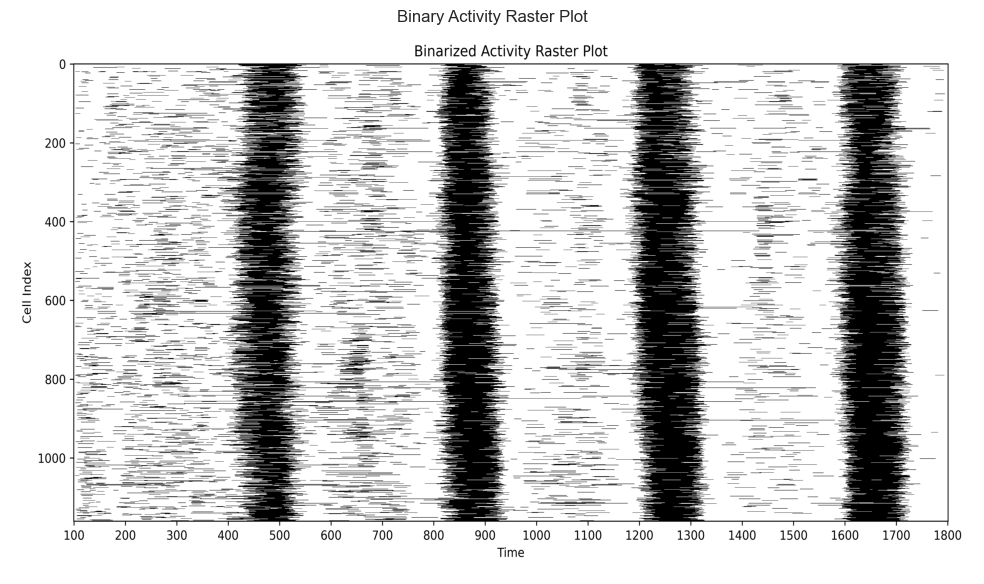

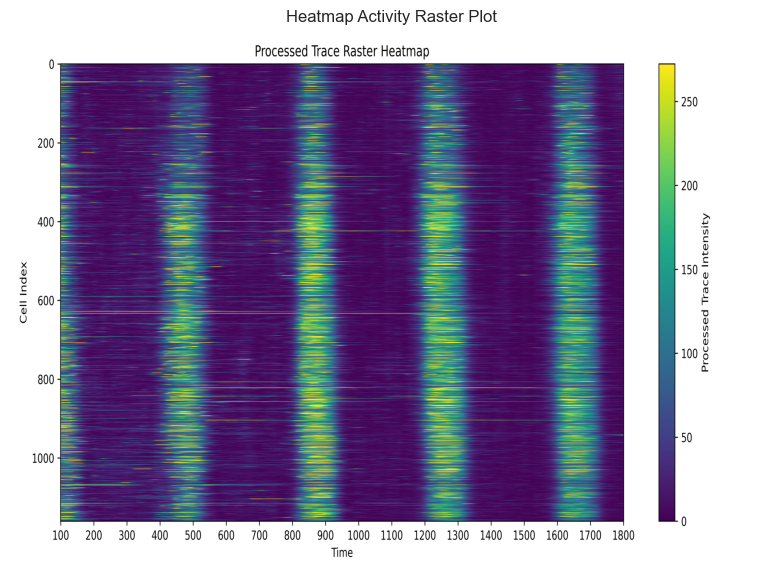

In [4]:
visualize_image(
    image_source=control_paths,
    image_name="signal-processing/raster_plot.png",
    title="Binary Activity Raster Plot",
    figsize=(10, 6)
)
visualize_image(
    image_source=control_paths,
    image_name="signal-processing/heatmap_raster.png",
    title="Heatmap Activity Raster Plot",
    figsize=(8, 6)
)

### Peaks population

In [5]:
print(f"Total number of peaks: {len(peaks)}")
print(f"Total number of cells: {len(cells)}")

Total number of peaks: 7792
Total number of cells: 1161


### Peaks statistics

[2025-08-26 16:24:41] [INFO] calcium: plot_histogram: removed 9 outliers out of 7792 on 'Duration (s)' (lower=-197, upper=328)


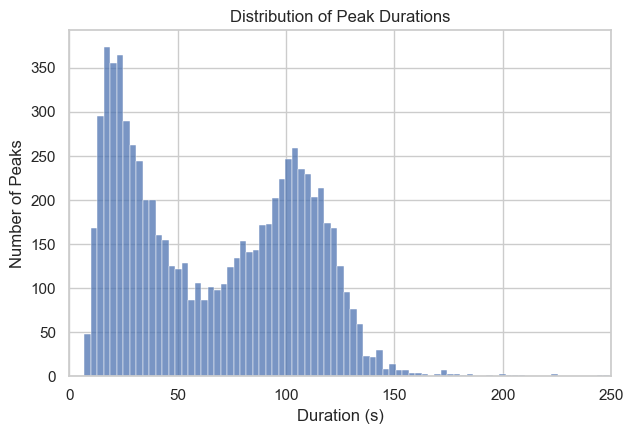

[2025-08-26 16:24:41] [INFO] calcium: plot_histogram: removed 4 outliers out of 7792 on 'Prominence (noise std units)' (lower=-464.98, upper=688.1)


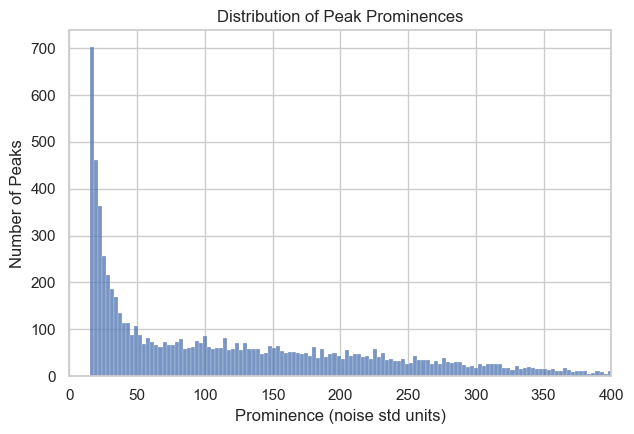

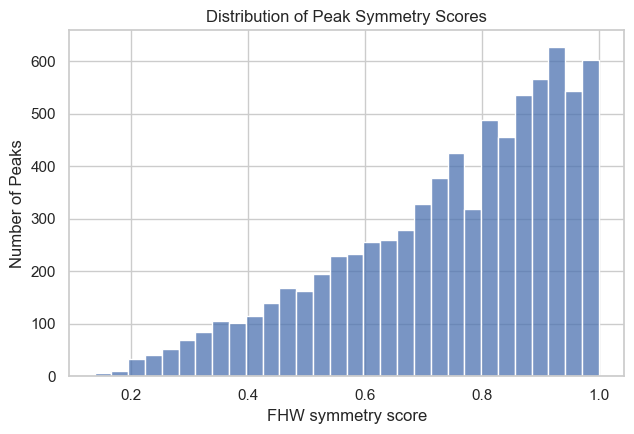

In [6]:
plot_histogram(
    df=peaks,
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks,
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks,
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Distribution of peaks per event types

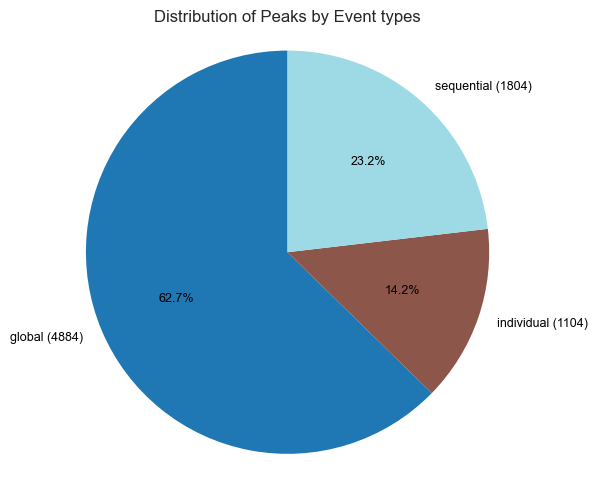

In [7]:
plot_pie_chart(
    df=peaks,
    column="In event",
    title="Distribution of Peaks by Event types",
    palette="tab20"
)

### Peaks statistics per event types

[2025-08-26 16:24:42] [INFO] calcium: plot_histogram_by_group: removed 9 outliers out of 7792 on 'Duration (s)' (lower=-197, upper=328)


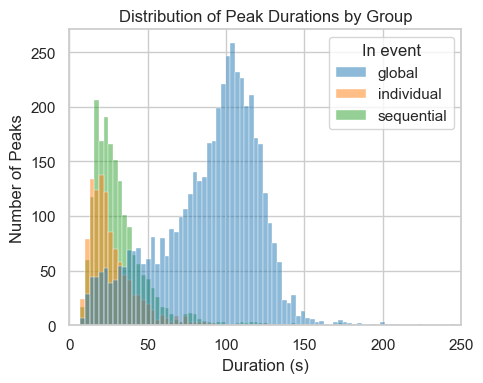

[2025-08-26 16:24:42] [INFO] calcium: plot_histogram_by_group: removed 4 outliers out of 7792 on 'Prominence (noise std units)' (lower=-464.98, upper=688.1)


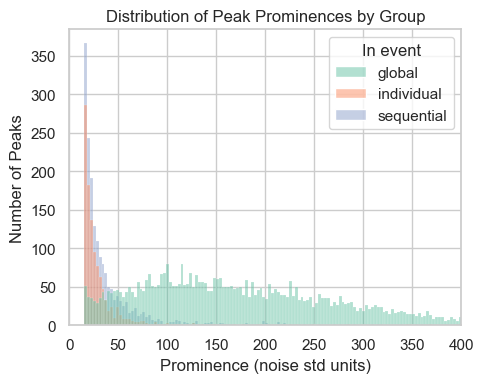

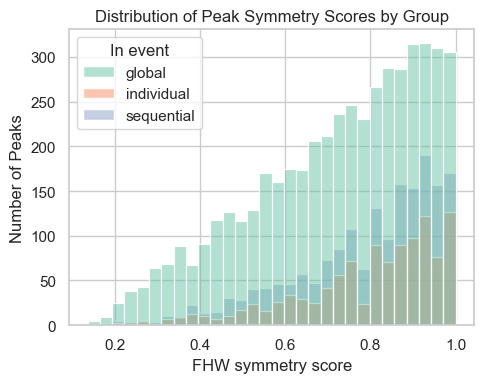

In [8]:
peaks["In event"] = peaks["In event"].fillna("individual")
plot_histogram_by_group(
    df=peaks,
    value_column="Duration (s)",
    group_column="In event",
    title="Distribution of Peak Durations by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250),
)
plot_histogram_by_group(
    df=peaks,
    value_column="Prominence (noise std units)",
    group_column="In event",
    title="Distribution of Peak Prominences by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400),
)
plot_histogram_by_group(
    df=peaks,
    value_column="FHW symmetry score",
    group_column="In event",
    title="Distribution of Peak Symmetry Scores by Group",
    ylabel="Number of Peaks",
    bin_count=30,
    multiple="layer",
    palette="Set2",
)

## GLOBAL EVENTS

### Peak statistics in global events

[2025-08-26 16:24:43] [INFO] calcium: plot_histogram: removed 10 outliers out of 4884 on 'Duration (s)' (lower=-56, upper=238)


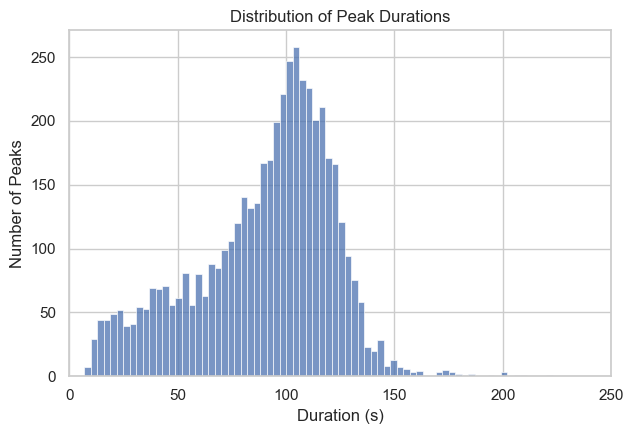

[2025-08-26 16:24:43] [INFO] calcium: plot_histogram: removed 4 outliers out of 4884 on 'Prominence (noise std units)' (lower=-343.07, upper=681.2)


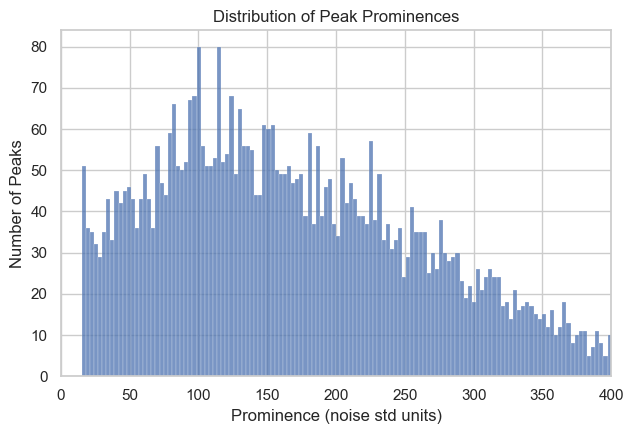

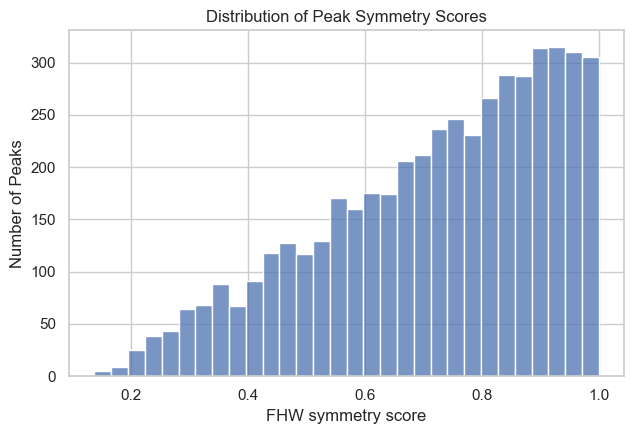

In [9]:
plot_histogram(
    df=peaks[peaks["In event"] == "global"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks[peaks["In event"] == "global"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks[peaks["In event"] == "global"],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Peak statistics in global event per event ID

[2025-08-26 16:24:43] [INFO] calcium: plot_histogram_by_group: removed 10 outliers out of 4884 on 'Duration (s)' (lower=-56, upper=238)


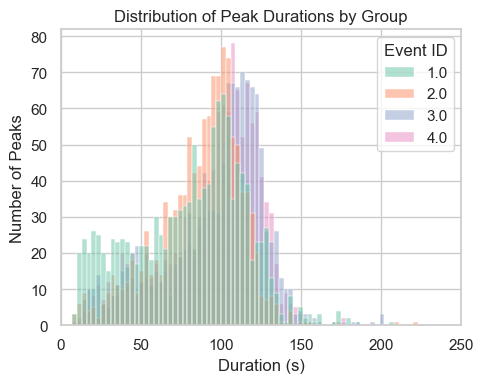

[2025-08-26 16:24:44] [INFO] calcium: plot_histogram_by_group: removed 4 outliers out of 4884 on 'Prominence (noise std units)' (lower=-343.07, upper=681.2)


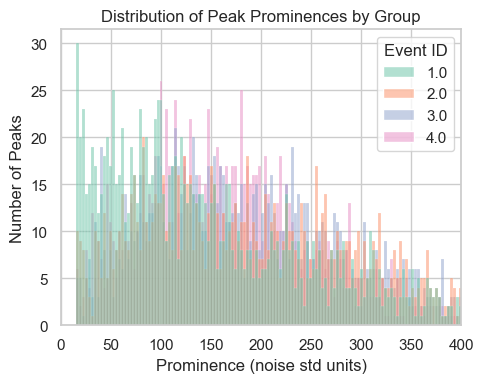

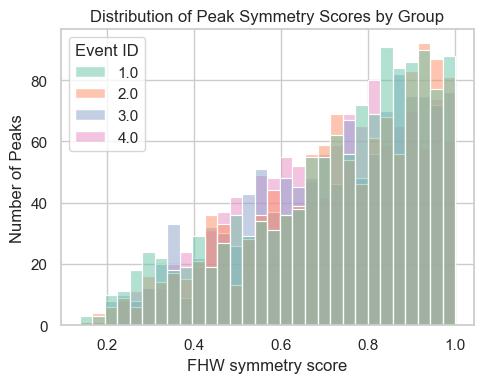

In [10]:
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "global"],
    value_column="Duration (s)",
    group_column="Event ID",
    title="Distribution of Peak Durations by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "global"],
    value_column="Prominence (noise std units)",
    group_column="Event ID",
    title="Distribution of Peak Prominences by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "global"],
    value_column="FHW symmetry score",
    group_column="Event ID",
    title="Distribution of Peak Symmetry Scores by Group",
    ylabel="Number of Peaks",
    bin_count=30,
    multiple="layer",
    palette="Set2"
)

### Kinetics of global events

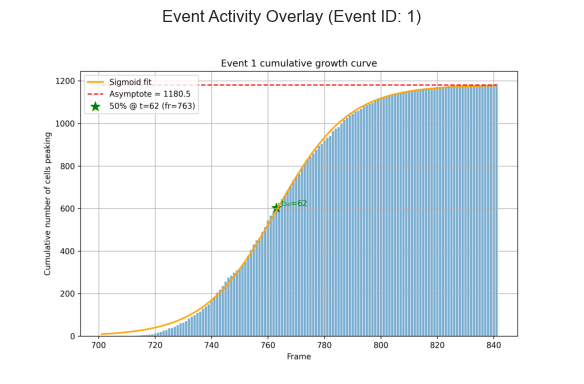

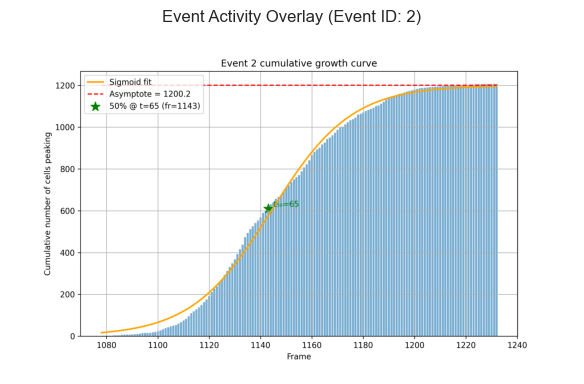

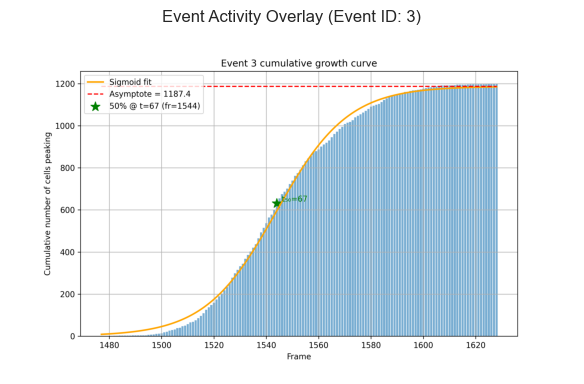

[2025-08-26 16:24:46] [ERROR] calcium: Failed to read image 'D:\Mateo\20250618\Output\IS1\events\event-growth-curve-4.png': [Errno 2] No such file or directory: 'D:\\Mateo\\20250618\\Output\\IS1\\events\\event-growth-curve-4.png'
Traceback (most recent call last):
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py", line 243, in visualize_image
    img = imread(img_path)
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\matplotlib\image.py", line 1512, in imread
    with img_open(fname) as image:
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\PIL\ImageFile.py", line 132, in __init__
    self.fp = open(fp, "rb")
FileNotFoundError: [Errno 2] No such file or di

In [11]:
global_events = events[events["Event type"] == "GlobalEvent"].copy()

for event_id in global_events["Event ID"]:
    visualize_image(
        image_source=control_paths,
        image_name=f"events/event-growth-curve-{event_id}.png",
        title=f"Event Activity Overlay (Event ID: {event_id})",
        figsize=(6, 4)
    )

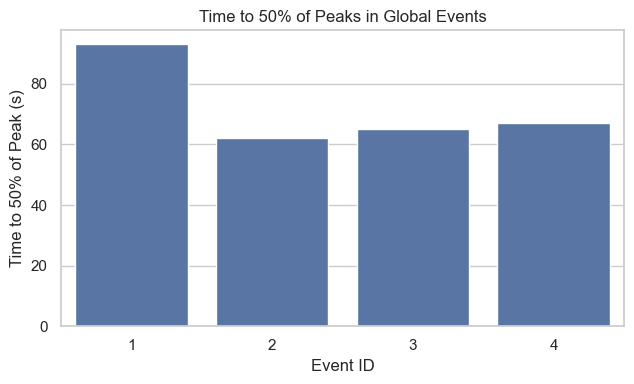

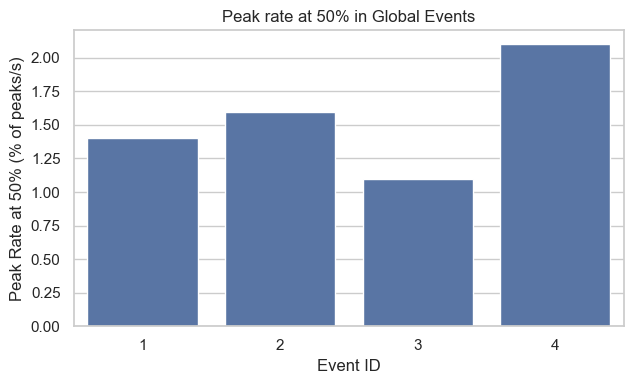

In [12]:
plot_bar(
    df=global_events,
    axis_column="Event ID",
    value_column="Time to 50% (s)",
    title="Time to 50% of Peaks in Global Events",
    ylabel="Time to 50% of Peak (s)",
    xlabel="Event ID",
    rotation=0,
    palette="muted",
    hue_column=None
)
plot_bar(
    df=global_events,
    axis_column="Event ID",
    value_column="Normalized peak rate at 50% (% of peaks/s)",
    title="Peak rate at 50% in Global Events",
    ylabel="Peak Rate at 50% (% of peaks/s)",
    xlabel="Event ID",
    rotation=0,
    palette="muted",
    hue_column=None
)

### Cells Occurrences in global events

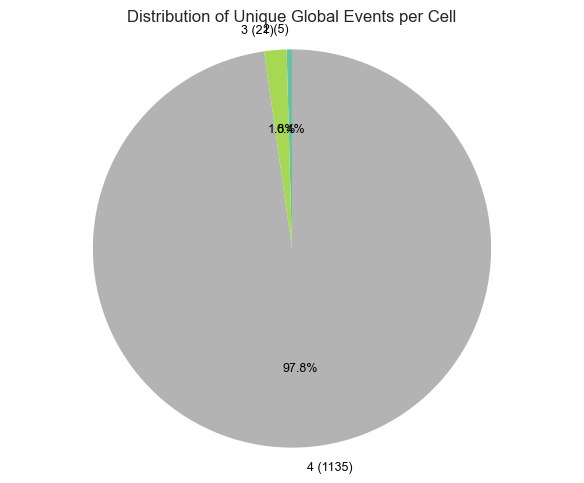

In [13]:
plot_pie_chart(
    df=cells,
    column="Occurrences in global events",
    title="Distribution of Unique Global Events per Cell",
    palette="Set2"
)

In [14]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_Occurrences_in_global_events_overlay.png",
    title="Cell Mapping with Occurrences in Global Events Overlay",
    figsize=(5, 6)
)

[2025-08-26 16:24:47] [ERROR] calcium: Failed to read image 'D:\Mateo\20250618\Output\IS1\cell-mapping\cell_Occurrences_in_global_events_overlay.png': [Errno 2] No such file or directory: 'D:\\Mateo\\20250618\\Output\\IS1\\cell-mapping\\cell_Occurrences_in_global_events_overlay.png'
Traceback (most recent call last):
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py", line 243, in visualize_image
    img = imread(img_path)
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\matplotlib\image.py", line 1512, in imread
    with img_open(fname) as image:
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\PIL\ImageFile.py", line 132, in __init__
    self.fp = open(fp,

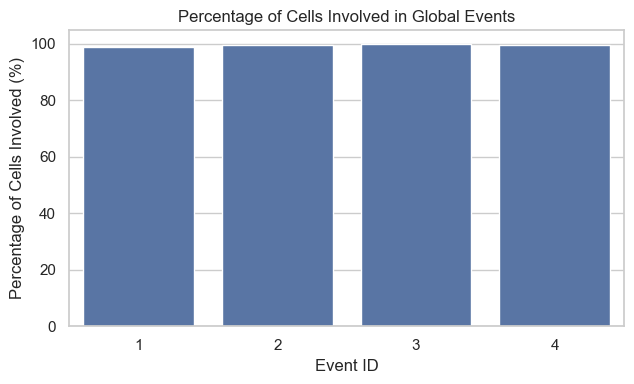

In [15]:
global_events["% of cells involved"] = 100 * global_events["Number of cells involved"] / len(cells)

plot_bar(
    df=global_events,
    axis_column="Event ID",
    value_column="% of cells involved",
    title="Percentage of Cells Involved in Global Events",
    ylabel="Percentage of Cells Involved (%)",
    xlabel="Event ID",
    rotation=0
)

### Inter-event interval analysis

In [16]:
intervals, periodicity, frequency = analyze_peak_intervals(events[events["Event type"] == "GlobalEvent"]["Event peak time (s)"].tolist())

print(f"Intervals between global event peaks: {intervals}")

if periodicity is not None:
    print(f"Estimated periodicity: {periodicity:.3f}")

if periodicity is not None and periodicity > 0.8:
    print("The global events exhibit a regular periodic pattern.")
    print(f"Estimated frequency (1/mean interval): {frequency:.3f} Hz")

Intervals between global event peaks: [381.0, 379.0, 399.0]
Estimated periodicity: 0.977
The global events exhibit a regular periodic pattern.
Estimated frequency (1/mean interval): 0.003 Hz


### Early peakers in the events

[2025-08-26 16:24:47] [ERROR] calcium: Failed to read image 'D:\Mateo\20250618\Output\IS1\cell-mapping\global_events\global_event_1_early_peakers_overlay.png': not a PNG file
Traceback (most recent call last):
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py", line 243, in visualize_image
    img = imread(img_path)
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\matplotlib\image.py", line 1512, in imread
    with img_open(fname) as image:
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\PIL\ImageFile.py", line 144, in __init__
    self._open()
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image

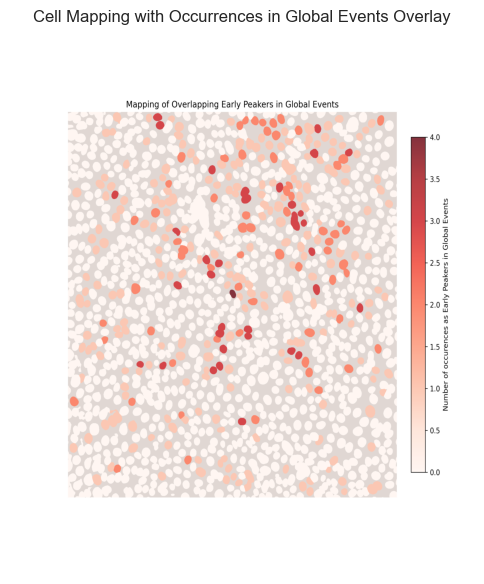

In [17]:
for event_id in global_events["Event ID"]:
    visualize_image(
        image_source=control_paths,
        image_name=f"cell-mapping/global_events/global_event_{event_id}_early_peakers_overlay.png",
        title=f"Cell Mapping with Early Peakers Overlay for event {event_id}",
        figsize=(5, 6)
    )

visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/global_events/global_event_overlap_early_peakers_overlay.png",
    title="Cell Mapping with Occurrences in Global Events Overlay",
    figsize=(5, 6)
)

[2025-08-26 16:24:48] [WARNING] calcium: 'total_events' is deprecated and ignored. Using 4 unique event IDs.
[2025-08-26 16:24:48] [INFO] calcium: Early peakers event-matrix: 323 cells x 4 events; black squares: 459


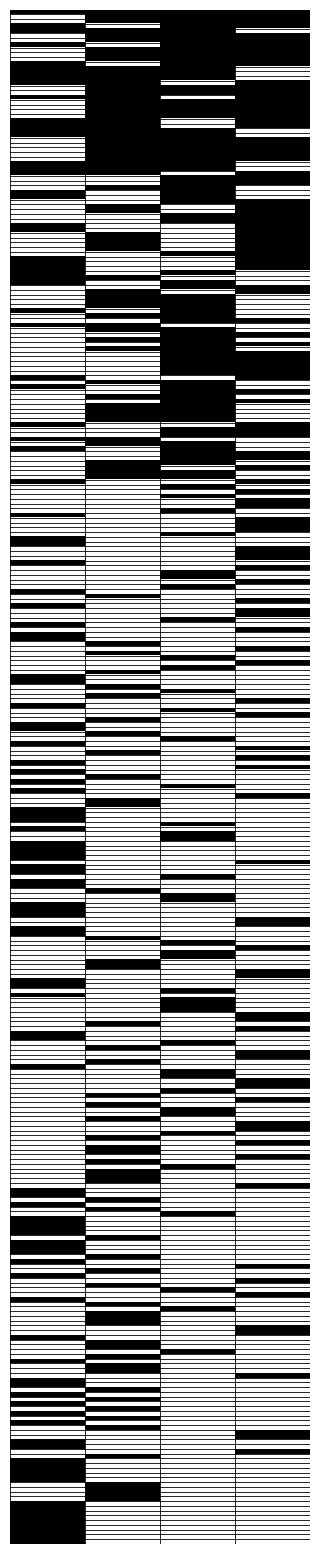

[2025-08-26 16:24:49] [INFO] calcium: Saved early peakers heatmap SVG to: early_peakers_heatmap.svg


array([[1, 1, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 1],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [18]:
plot_early_peakers_heatmap(
    cells=cells,
    total_events=len(global_events),
)

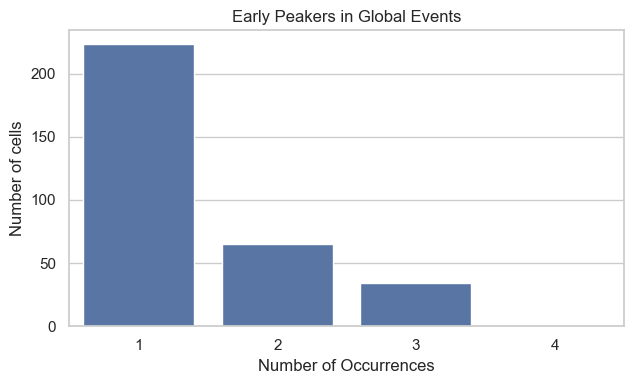

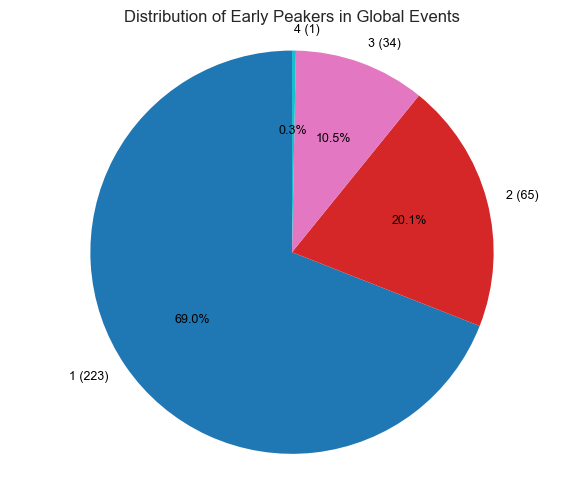

In [19]:
early_peakers_df = (
    cells[cells["Occurrences in global events as early peaker"] > 0]
      .groupby("Occurrences in global events as early peaker")
      .size()
      .reset_index(name="Number of cells")
      .rename(columns={"Occurrences in global events as early peaker": "Number of Occurrences"})
      .sort_values("Number of Occurrences")
)

plot_bar(
    df=early_peakers_df,
    axis_column="Number of Occurrences",
    value_column="Number of cells",
    title="Early Peakers in Global Events",
    xlabel="Number of Occurrences",
    ylabel="Number of cells",
    rotation=0
)

plot_pie_chart(
    df=cells[cells["Occurrences in global events as early peaker"] > 0],
    column="Occurrences in global events as early peaker",
    title="Distribution of Early Peakers in Global Events"
)

## SEQUENTIAL EVENTS

### Cells Occurrences in sequencial events

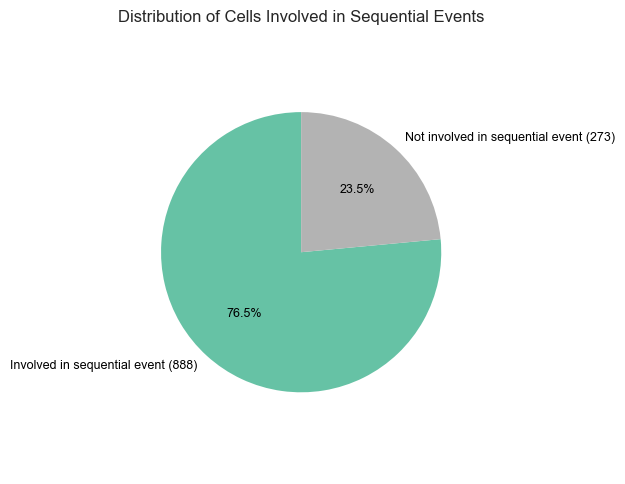

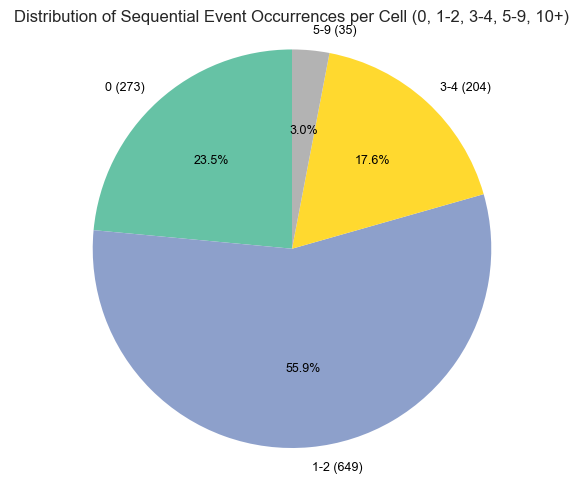

In [20]:
cells["Involved in sequential event"] = cells["Occurrences in sequential events"].apply(lambda x: "Involved in sequential event" if x > 0 else "Not involved in sequential event")

plot_pie_chart(
    df=cells,
    column="Involved in sequential event",
    title="Distribution of Cells Involved in Sequential Events",
    palette="Set2"
)

def cells_category(n: int) -> str:
    if n == 0:
        return "0"
    elif n == 1 or n == 2:
        return "1-2"
    elif n == 3 or n == 4:
        return "3-4"
    elif n < 10:
        return "5-9"
    else:
        return "10+"

cells["Occurrences in sequential events category"] = cells["Occurrences in sequential events"].apply(cells_category)

plot_pie_chart(
    df=cells,
    column="Occurrences in sequential events category",
    title="Distribution of Sequential Event Occurrences per Cell (0, 1-2, 3-4, 5-9, 10+)",
    palette="Set2"
)

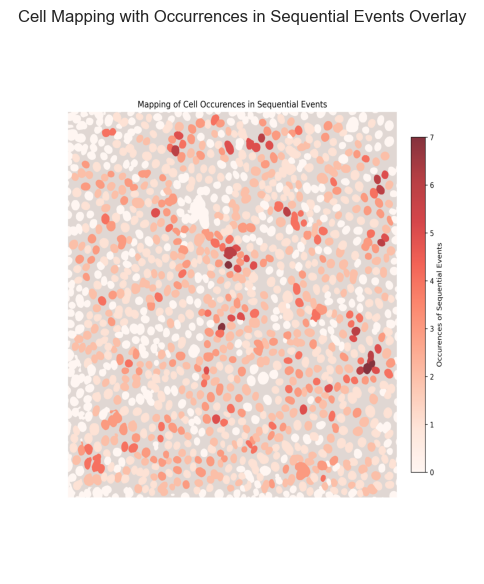

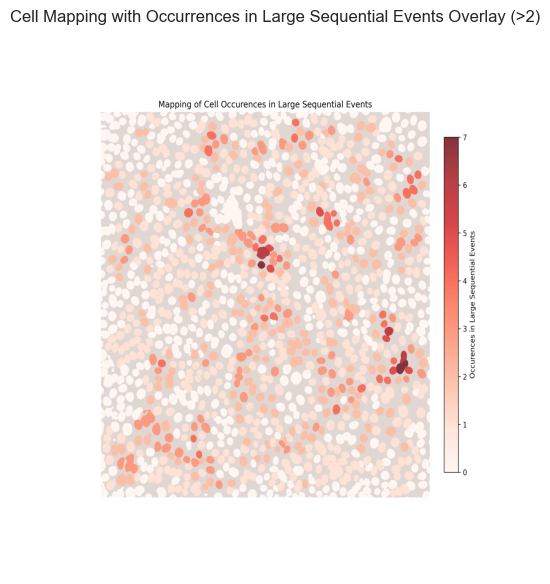

In [21]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_Occurences_in_sequential_events_overlay.png",
    title="Cell Mapping with Occurrences in Sequential Events Overlay",
    figsize=(5, 6)
)
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_Occurences_in_large_sequential_events_overlay.png",
    title="Cell Mapping with Occurrences in Large Sequential Events Overlay (>2)",
    figsize=(5, 6)
)

### Peaks statistics in sequential events

[2025-08-26 16:24:52] [INFO] calcium: plot_histogram: removed 33 outliers out of 1804 on 'Duration (s)' (lower=-9.5, upper=104.5)


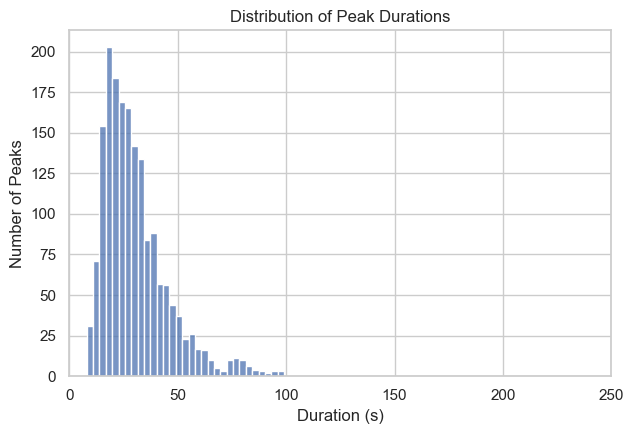

[2025-08-26 16:24:52] [INFO] calcium: plot_histogram: removed 85 outliers out of 1804 on 'Prominence (noise std units)' (lower=-18.637, upper=131.51)


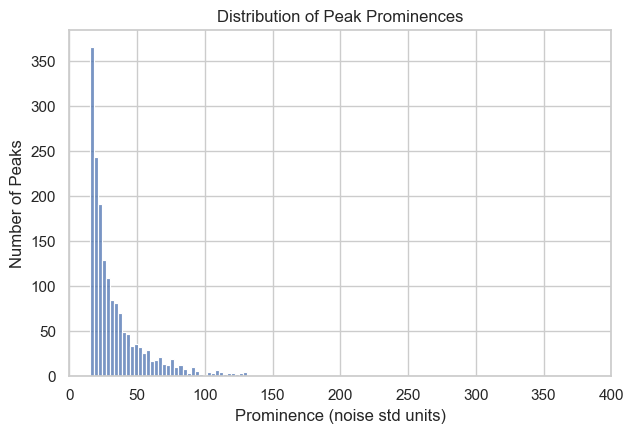

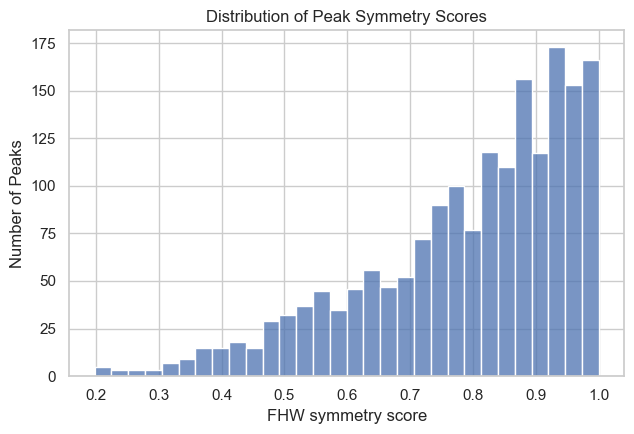

In [22]:
plot_histogram(
    df=peaks[peaks["In event"] == "sequential"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks[peaks["In event"] == "sequential"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks[peaks["In event"] == "sequential"],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Cell-cell communication speed

[2025-08-26 16:24:53] [INFO] calcium: plot_histogram: removed 0 outliers out of 564 on 'Average communication speed (um/s)' (lower=-15.005, upper=24.93)


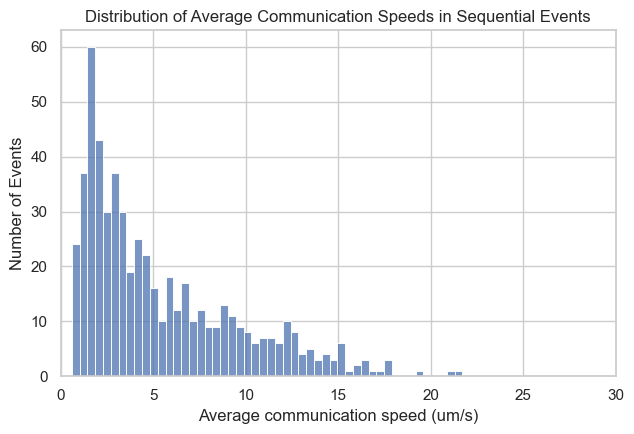

[2025-08-26 16:24:53] [INFO] calcium: plot_histogram: removed 0 outliers out of 1240 on 'Speed (um/s)' (lower=-20.348, upper=45.578)


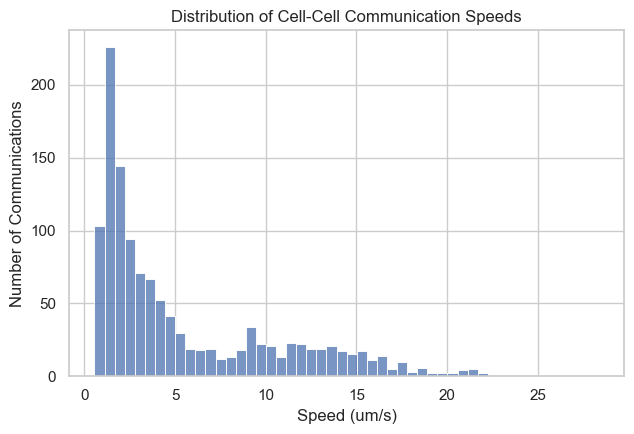

In [23]:
sequential_events = events[events["Event type"] == "SequentialEvent"].copy()
plot_histogram(
    df=sequential_events,
    column="Average communication speed (um/s)",
    title="Distribution of Average Communication Speeds in Sequential Events",
    ylabel="Number of Events",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 30)
)

plot_histogram(
    df=communications,
    column="Speed (um/s)",
    title="Distribution of Cell-Cell Communication Speeds",
    ylabel="Number of Communications",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3, 5),
    return_outliers=False,
)

### Double distribution in cell-cell communication speeds

In [24]:
def seq_events_category(n: int) -> str:
    if n == 2:
        return "2"
    elif n == 3:
        return "3"
    elif n == 4:
        return "4"
    elif 5 <= n <= 10:
        return "5-10"
    else:
        return "11+"

sequential_events["Number of cells involved category"] = sequential_events["Number of cells involved"].apply(seq_events_category)

# Assign 'Number of cells involved category' to peaks based on their sequential event
peaks.loc[peaks["In event"] == "sequential", "Number of cells involved category"] = (
    peaks.loc[peaks["In event"] == "sequential", "Event ID"]
    .map(sequential_events.set_index("Event ID")["Number of cells involved category"])
)

# Assign 'Number of cells involved category' to communications based on their Event ID
communications["Number of cells involved category"] = (
    communications["Event ID"].map(sequential_events.set_index("Event ID")["Number of cells involved category"])
)

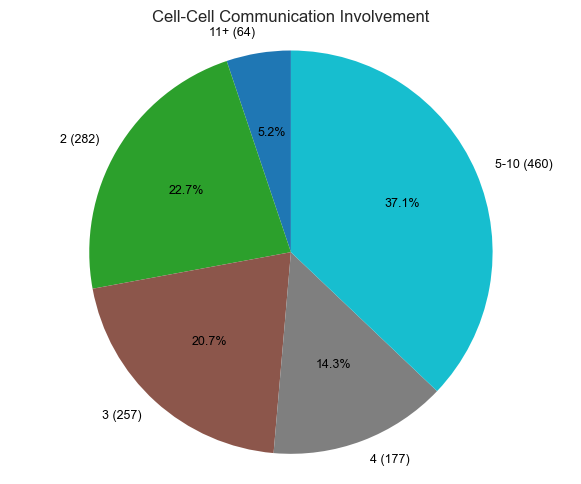

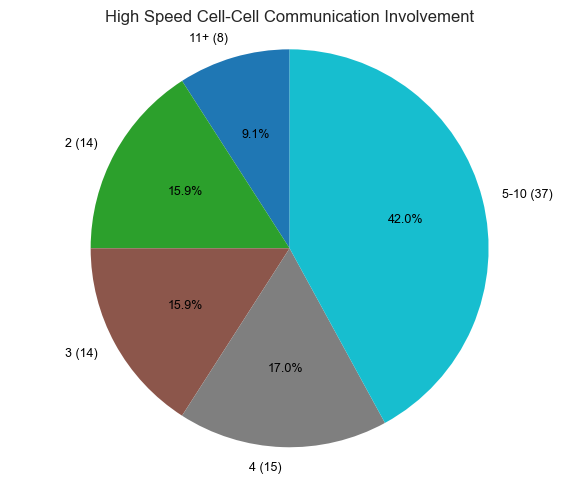

In [25]:
communications["Speed category"] = communications["Speed (um/s)"].apply(lambda x: "High speed" if x > 15 else "Low speed")
plot_pie_chart(
    df=communications,
    column="Number of cells involved category",
    title="Cell-Cell Communication Involvement"
)
plot_pie_chart(
    df=communications[communications["Speed category"] == "High speed"],
    column="Number of cells involved category",
    title="High Speed Cell-Cell Communication Involvement"
)

[2025-08-26 16:24:54] [INFO] calcium: plot_histogram: removed 1 outliers out of 88 on 'Speed (um/s)' (lower=6.4125, upper=28.182)


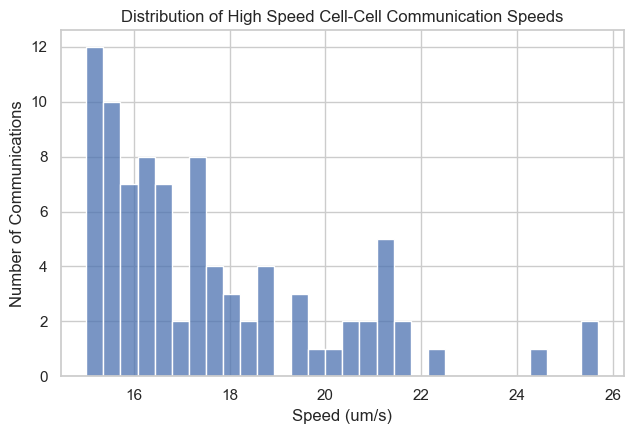

[2025-08-26 16:24:54] [INFO] calcium: plot_histogram_by_group: removed 1 outliers out of 88 on 'Speed (um/s)' (lower=6.4125, upper=28.182)


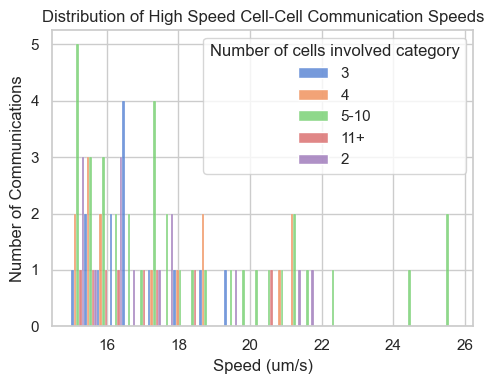

In [26]:
plot_histogram(
    df=communications[communications["Speed category"] == "High speed"],
    column="Speed (um/s)",
    title="Distribution of High Speed Cell-Cell Communication Speeds",
    ylabel="Number of Communications",
    bin_count=30,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False
)
plot_histogram_by_group(
    df=communications[communications["Speed category"] == "High speed"],
    value_column="Speed (um/s)",
    group_column="Number of cells involved category",
    title="Distribution of High Speed Cell-Cell Communication Speeds",
    ylabel="Number of Communications",
    bin_count=30,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    multiple="dodge"
)

[2025-08-26 16:24:54] [INFO] calcium: plot_histogram_by_group: removed 0 outliers out of 74 on 'Event time phase (fraction of event duration)' (lower=-1.85, upper=2.63)


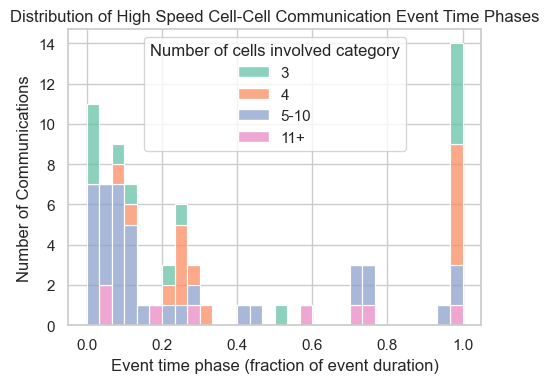

[2025-08-26 16:24:55] [INFO] calcium: plot_histogram_by_group: removed 0 outliers out of 74 on 'Event recruitment phase (fraction of involved cells)' (lower=-0.99, upper=1.32)


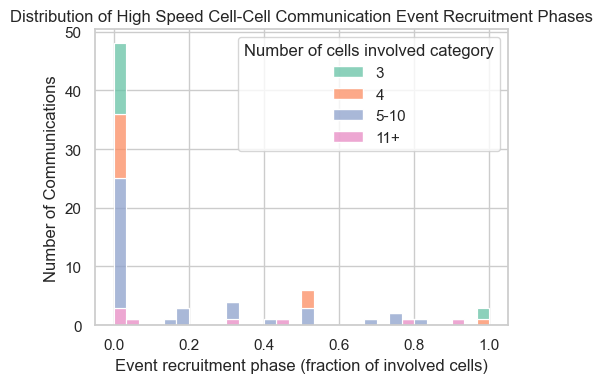

In [27]:
plot_histogram_by_group(
    df=communications[communications["Speed category"] == "High speed"],
    value_column="Event time phase (fraction of event duration)",
    group_column="Number of cells involved category",
    title="Distribution of High Speed Cell-Cell Communication Event Time Phases",
    ylabel="Number of Communications",
    bin_count=30,
    palette="Set2",
    multiple="stack",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=None,
    y_axis_boundaries=None
)
plot_histogram_by_group(
    df=communications[communications["Speed category"] == "High speed"],
    value_column="Event recruitment phase (fraction of involved cells)",
    group_column="Number of cells involved category",
    title="Distribution of High Speed Cell-Cell Communication Event Recruitment Phases",
    ylabel="Number of Communications",
    bin_count=30,
    palette="Set2",
    multiple="stack",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=None,
    y_axis_boundaries=None,
)

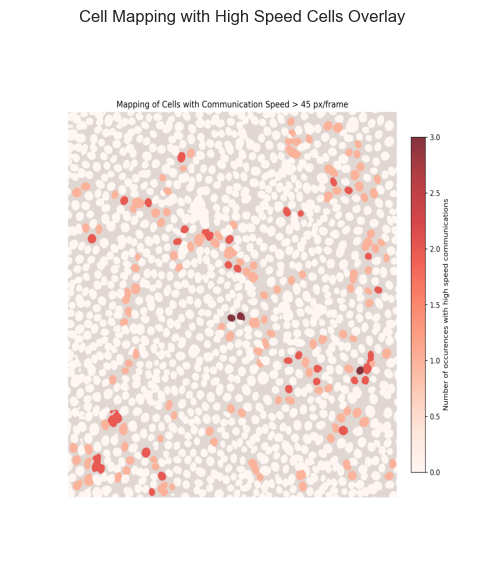

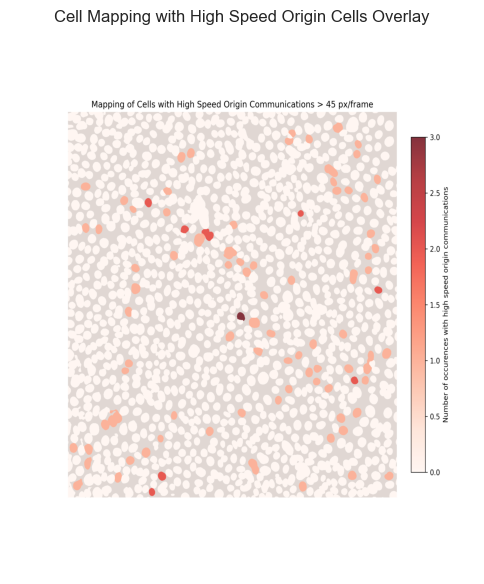

In [28]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/high_speed_cells_overlay.png",
    title="Cell Mapping with High Speed Cells Overlay",
    figsize=(5, 6)
)
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/high_speed_origin_cells_overlay.png",
    title="Cell Mapping with High Speed Origin Cells Overlay",
    figsize=(5, 6)
)

Communication ID  Event ID  Origin cell ID  Origin cell peak ID  \
4        3015538601184         6            1676                    6   
17       3015538598880        10            1272                    2   
18       3015538590480        11            1563                    0   
19       3015538593936        11            1530                    0   
21       3015538591632        11            1479                    1   
...                ...       ...             ...                  ...   
1169     3015517823344       517            1726                    1   
1170     3015517827712       517            1726                    1   
1175     3015524066080       520            1604                    0   
1188     3015524069824       527            1725                    3   
1192     3015517824400       531            1721                    0   

      Cause cell ID  Cause cell peak ID  Start time (s)  End time (s)  \
4              1678                   7          1382.0        1382.0   
17             1225                   2           165.0         165.0   
18             1530                   0           220.0         220.0   
19             1445                   1           220.0         220.0   
21             1514                   1           221.0         221.0   
...             ...                 ...             ...           ...   
1169           1686                   1           100.0         101.0   
1170           1776                   1           100.0         101.0   
1175           1657                   0            31.0          32.0   
1188           1675                   2           927.0         928.0   
1192           1681                   0           188.0         189.0   

      Duration (s)  Distance (um)  Speed (um/s)  \
4              0.0          15.36         15.36   
17             0.0          16.03         16.03   
18             0.0          21.37         21.37   
19             0.0          25.70         25.70   
21             0.0          15.23         15.23   
...            ...            ...           ...   
1169           1.0          15.69         15.69   
1170           1.0          20.94         20.94   
1175           1.0          16.25         16.25   
1188           1.0          16.75         16.75   
1192           1.0          15.44         15.44   

      Event time phase (fraction of event duration)  \
4                                              1.00   
17                                             1.00   
18                                             0.00   
19                                             0.00   
21                                             0.08   
...                                             ...   
1169                                           0.25   
1170                                           0.25   
1175                                           0.07   
1188                                            NaN   
1192                                            NaN   

      Event recruitment phase (fraction of involved cells)       dataset  \
4                                                   0.0     20250326_IS1   
17                                                  0.0     20250326_IS1   
18                                                  0.0     20250326_IS1   
19                                                  0.0     20250326_IS1   
21                                                  0.5     20250326_IS1   
...                                                 ...              ...   
1169                                                0.0     20250326_IS1   
1170                                                0.0     20250326_IS1   
1175                                                0.0     20250326_IS1   
1188                                                NaN     20250326_IS1   
1192                                                NaN     20250326_IS1   

     Number of cells involved category Speed category  
4        

Speed category  High speed  Low speed
Origin cell ID                       
194                      0          1
202                      0          1
204                      0          4
214                      0          1
218                      0          1
...                    ...        ...
1793                     0          1
1794                     0          1
1796                     0          3
1797                     2          0
1798                     0          1

[621 rows x 2 columns]

Cell ID  Centroid X coordinate (um)  Centroid Y coordinate (um)  \
0         194                      108.23                        5.85   
6         202                      323.05                        8.78   
8         204                      222.62                        9.75   
16        214                      338.00                       12.35   
19        218                      295.43                       13.33   
...       ...                         ...                         ...   
1154     1793                      366.93                      491.07   
1155     1794                      419.25                      491.40   
1156     1796                      451.43                      491.40   
1157     1797                      127.08                      491.73   
1158     1798                      145.93                      492.38   

      Number of peaks  Is active  Occurrences in global events  \
0                   6       True                             4   
6                   7       True                             4   
8                   8       True                             4   
16                  8       True                             4   
19                 12       True                             4   
...               ...        ...                           ...   
1154                7       True                             4   
1155                7       True                             4   
1156                6       True                             4   
1157                6       True                             4   
1158                6       True                             4   

      Occurrences in global events as early peaker Early peaker event IDs  \
0                                                0                     []   
6                                                2                 [3, 4]   
8                                                0                     []   
16                                               0                     []   
19                                               2                 [1, 3]   
...                                            ...                    ...   
1154                                             1                    [1]   
1155                                             1                    [1]   
1156                                             0                     []   
1157                                             0                     []   
1158                                             0                     []   

      Occurrences in sequential events  \
0                                    1   
6                                    1   
8                                    4   
16                                   2   
19                                   3   
...                                ...   
1154                                 1   
1155                                 1   
1156                                 2   
1157                                 1   
1158                                 2   

      Occurrences in sequential events as origin  \
0                                              1   
6                                              1   
8                                              2   
16                                             0   
19                                             1   
...                                          ...   
1154                                           1   
1155                                           1   
1156                                           2   
1157                                           1   
1158                                           1   

      Occurrences in individual events  Peak frequency (Hz)  \
0                                    1               0.0035   
6                                    1               0.0041   
8                                    0               0.0047   
16                           

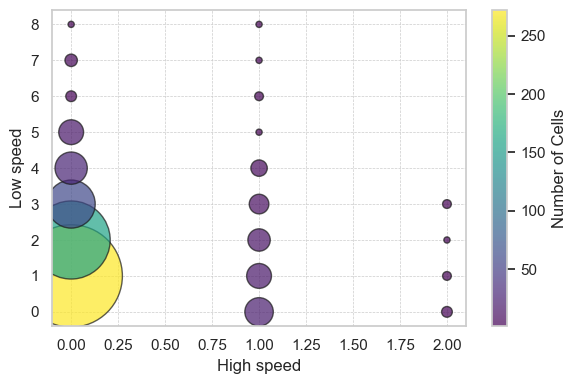

In [29]:
display(communications[communications["Speed category"] == "High speed"])

counts = (
    communications
    .groupby(["Origin cell ID", "Speed category"], dropna=False)
    .size()
    .unstack("Speed category", fill_value=0)
)
display(counts)
out = cells.copy()
out = out.merge(
    counts,
    left_on="Cell ID",
    right_index=True,
    how="left"
).dropna()
display(out)

plot_scatter_size_coded(
    df=out,
    x_col="High speed",
    y_col="Low speed"
)



### Number of cells involved per sequential events

[2025-08-26 16:24:59] [INFO] calcium: plot_histogram: removed 5 outliers out of 564 on 'Number of cells involved' (lower=-4, upper=10)


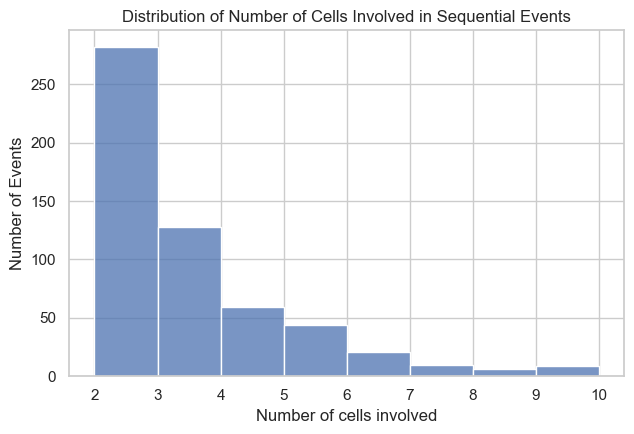

In [30]:
plot_histogram(
    df=sequential_events,
    column="Number of cells involved",
    title="Distribution of Number of Cells Involved in Sequential Events",
    ylabel="Number of Events",
    bin_width=1,
    filter_outliers=True,
    outliers_bounds=(3, 3),
)

### Influence of cell count per event on statistics

[2025-08-26 16:24:59] [INFO] calcium: plot_histogram_by_group: removed 33 outliers out of 1804 on 'Duration (s)' (lower=-9.5, upper=104.5)


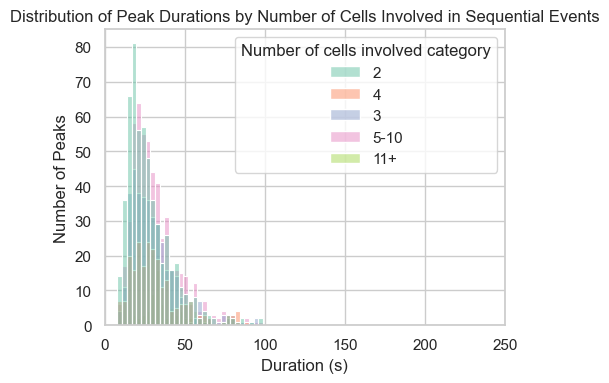

[2025-08-26 16:25:00] [INFO] calcium: plot_histogram_by_group: removed 85 outliers out of 1804 on 'Prominence (noise std units)' (lower=-18.637, upper=131.51)


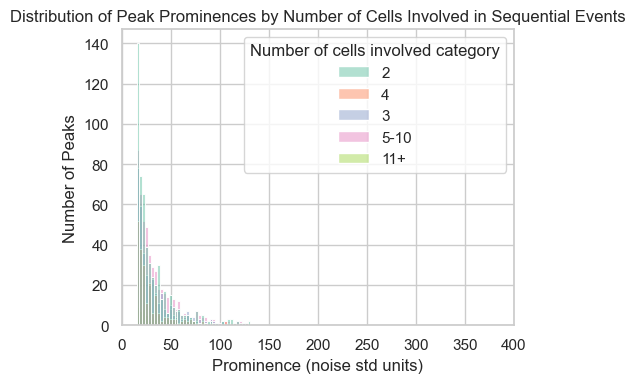

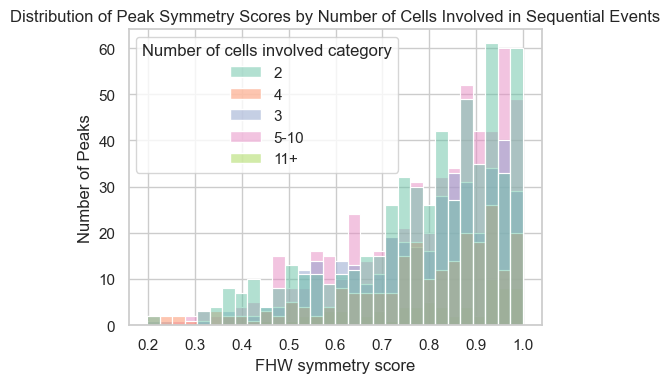

In [31]:
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="Duration (s)",
    group_column="Number of cells involved category",
    title="Distribution of Peak Durations by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="Prominence (noise std units)",
    group_column="Number of cells involved category",
    title="Distribution of Peak Prominences by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="FHW symmetry score",
    group_column="Number of cells involved category",
    title="Distribution of Peak Symmetry Scores by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_count=30,
    multiple="layer",
    palette="Set2"
)

[2025-08-26 16:25:01] [INFO] calcium: plot_histogram_by_group: removed 0 outliers out of 564 on 'Average communication speed (um/s)' (lower=-15.005, upper=24.93)


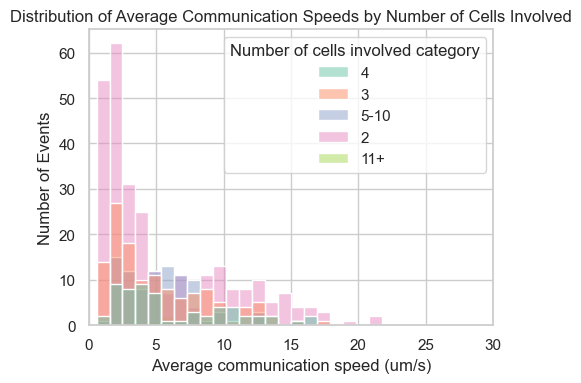

[2025-08-26 16:25:01] [INFO] calcium: plot_histogram_by_group: removed 0 outliers out of 1240 on 'Speed (um/s)' (lower=-20.348, upper=30.928)


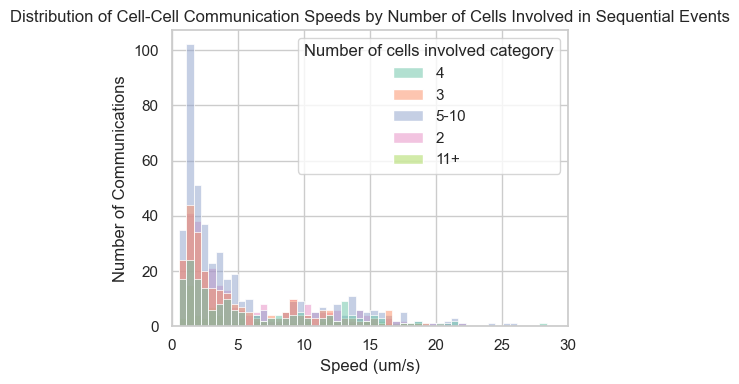

In [32]:
plot_histogram_by_group(
    df=sequential_events,
    value_column="Average communication speed (um/s)",
    group_column="Number of cells involved category",
    title="Distribution of Average Communication Speeds by Number of Cells Involved",
    ylabel="Number of Events",
    bin_width=1,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 30)
)

plot_histogram_by_group(
    df=communications,
    value_column="Speed (um/s)",
    group_column="Number of cells involved category",
    title="Distribution of Cell-Cell Communication Speeds by Number of Cells Involved in Sequential Events",
    ylabel="Number of Communications",
    bin_count=50,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 30)
)

### Cells Occurrences as origin in sequential events

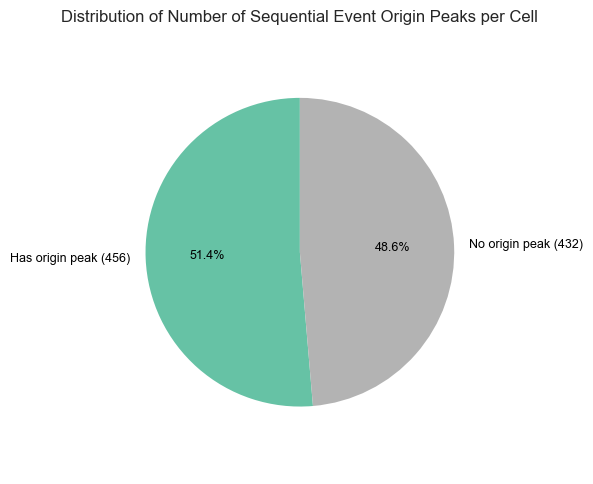

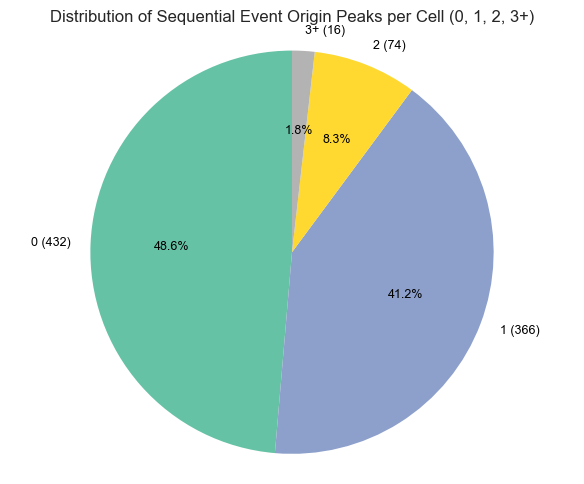

In [33]:
cells["Has origin peak"] = cells["Occurrences in sequential events as origin"].apply(lambda x: "Has origin peak" if x > 0 else "No origin peak")
plot_pie_chart(
    df=cells[cells["Occurrences in sequential events"] > 0],
    column="Has origin peak",
    title="Distribution of Number of Sequential Event Origin Peaks per Cell",
    palette="Set2"
)
def origin_peak_category(n: int) -> str:
    if n == 0:
        return "0"
    elif n == 1:
        return "1"
    elif n == 2:
        return "2"
    else:
        return "3+"

cells["Origin peak category"] = cells["Occurrences in sequential events as origin"].apply(origin_peak_category)

plot_pie_chart(
    df=cells[cells["Occurrences in sequential events"] > 0],
    column="Origin peak category",
    title="Distribution of Sequential Event Origin Peaks per Cell (0, 1, 2, 3+)",
    palette="Set2"
)


In [34]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_Occurrences_in_origin_seq_events_overlay.png",
    title="Cell Mapping with Origin Peaks Overlay",
    figsize=(5, 6)
)

[2025-08-26 16:25:02] [ERROR] calcium: Failed to read image 'D:\Mateo\20250618\Output\IS1\cell-mapping\cell_Occurrences_in_origin_seq_events_overlay.png': [Errno 2] No such file or directory: 'D:\\Mateo\\20250618\\Output\\IS1\\cell-mapping\\cell_Occurrences_in_origin_seq_events_overlay.png'
Traceback (most recent call last):
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py", line 243, in visualize_image
    img = imread(img_path)
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\matplotlib\image.py", line 1512, in imread
    with img_open(fname) as image:
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\PIL\ImageFile.py", line 132, in __init__
    self.fp = 

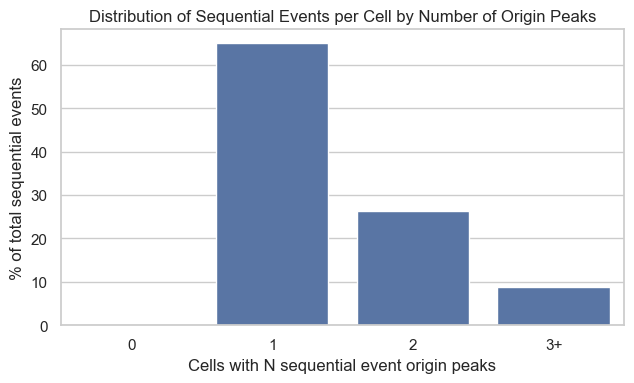

In [35]:
# Sum the total number of sequential origin peaks for each exact value (0, 1, 2, 3, ...)
total_peaks_per_exact_value = (
    cells.groupby("Origin peak category")
    ["Occurrences in sequential events as origin"]
    .sum()
    .reset_index(name="Total origin peaks")
)

# Compute normalized percentage
total_sum = total_peaks_per_exact_value["Total origin peaks"].sum()
total_peaks_per_exact_value["% of total"] = (
    total_peaks_per_exact_value["Total origin peaks"] / total_sum * 100
).round(2)

plot_bar(
    df=total_peaks_per_exact_value,
    axis_column="Origin peak category",
    value_column="% of total",
    title="Distribution of Sequential Events per Cell by Number of Origin Peaks",
    ylabel="% of total sequential events",
    xlabel="Cells with N sequential event origin peaks",
    rotation=0
)

### Connection network between cells

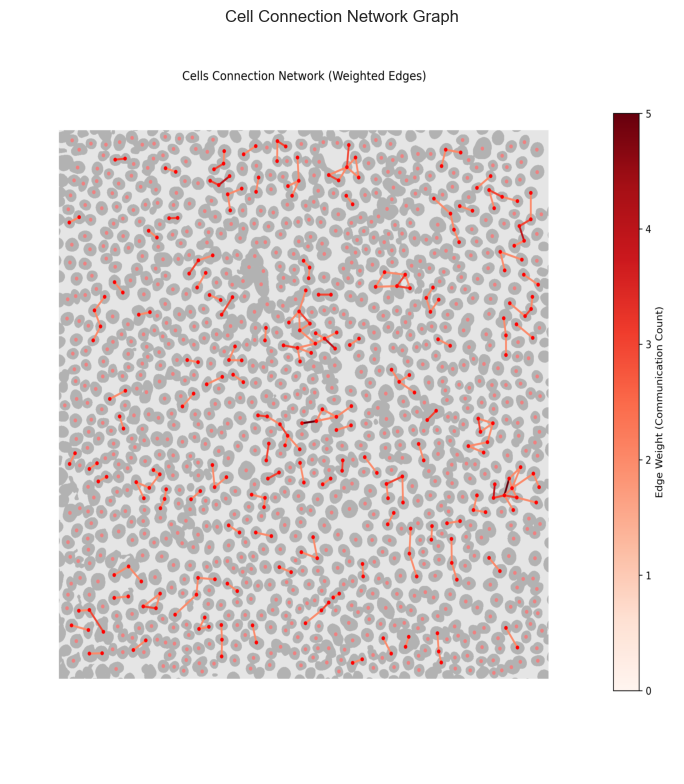

In [36]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_connection_network/cell_connection_network_95.png",
    title="Cell Connection Network Graph",
    figsize=(7, 8)
)

### Pair/Trios with high communication networks

[2025-08-26 16:25:04] [INFO] calcium: build_neighbor_pair_stats: built 3337 pairs across 1 datasets (mean distance=15.99 um)


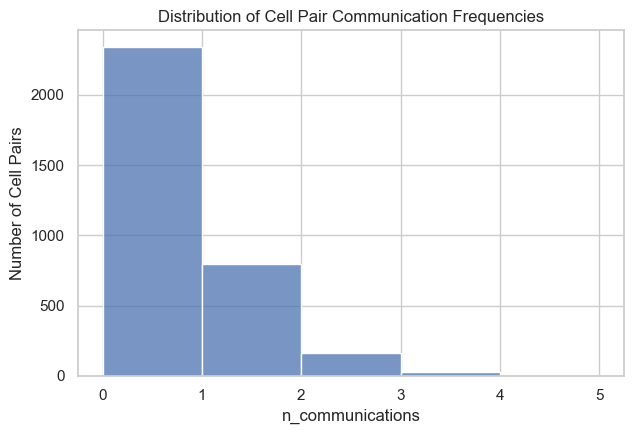

95th percentile threshold: 2.0


In [37]:
pairs_communication_df = build_neighbor_pair_stats(
    cells_df=cells,
    comm_df=communications,
    dataset_col="dataset",
    cell_id_col="Cell ID",
    centroid_x_col="Centroid X coordinate (um)",
    centroid_y_col="Centroid Y coordinate (um)",
    neighbors_col="Neighbors (labels)",
    edge_cols=("Cell ID", "Neighbor ID")
    )

plot_histogram(
    df=pairs_communication_df,
    column="n_communications",
    title="Distribution of Cell Pair Communication Frequencies",
    ylabel="Number of Cell Pairs",
    bin_width=1,
    filter_outliers=False,
    outliers_bounds=(3,3),
)

percentile_thresh = pairs_communication_df["n_communications"].quantile(0.95)
print(f"95th percentile threshold: {percentile_thresh}")

top_pair_communication_df = pairs_communication_df[pairs_communication_df["n_communications"] >= percentile_thresh].copy()

origin_com = communications["Origin cell ID"]
cause_com = communications["Cause cell ID"]
communications["pair_key"] = list(
    zip(origin_com.where(origin_com <= cause_com, cause_com),
        cause_com.where(cause_com >= origin_com, origin_com))
)

top_pair_keys = set(zip(top_pair_communication_df["Cell A"], top_pair_communication_df["Cell B"]))
communications["from_high_comm_pair"] = communications["pair_key"].isin(top_pair_keys)

peaks_in_top_comms = pd.concat([
    communications.loc[communications["from_high_comm_pair"], ["Origin cell ID", "Origin cell peak ID"]]
        .rename(columns={"Origin cell ID": "Cell ID", "Origin cell peak ID": "Peak ID"}),
    communications.loc[communications["from_high_comm_pair"], ["Cause cell ID", "Cause cell peak ID"]]
        .rename(columns={"Cause cell ID": "Cell ID", "Cause cell peak ID": "Peak ID"})
], ignore_index=True).drop_duplicates()


peaks["from_high_comm_pair"] = peaks.set_index(["Cell ID", "Peak ID"]).index.isin(peaks_in_top_comms.set_index(["Cell ID", "Peak ID"]).index)

In [38]:
cells_in_pairs = pd.Series(
    [cell for pair in top_pair_keys for cell in pair]
)

highly_connected_cells = (
    cells_in_pairs.value_counts()
    .reset_index()
    .rename(columns={"index": "Cell ID", "count": "Number of highly connected pairs"})
)

comms_high = communications.loc[communications["from_high_comm_pair"], ["Origin cell ID", "Cause cell ID"]].copy()

# Counts as origin and as cause
origin_counts = comms_high["Origin cell ID"].value_counts().rename("n_origin")
cause_counts = comms_high["Cause cell ID"].value_counts().rename("n_cause")

per_cell_comm = (
    pd.concat([origin_counts, cause_counts], axis=1)
    .fillna(0)
    .astype(int)
)

# Total comms involved = as origin + as cause
per_cell_comm["n_communications"] = per_cell_comm["n_origin"] + per_cell_comm["n_cause"]

# Ratio = origin / total (safe divide)
per_cell_comm["origin_ratio"] = per_cell_comm["n_origin"] / per_cell_comm["n_communications"].replace({0: pd.NA})

# Make Cell ID a column for merging
per_cell_comm = per_cell_comm.reset_index().rename(columns={"index": "Cell ID"})

# 3) Merge into your highly_connected_cells table
highly_connected_cells = highly_connected_cells.merge(
    per_cell_comm[["Cell ID", "n_communications", "n_origin", "origin_ratio"]],
    on="Cell ID",
    how="left"
)

# Fill cells that appear in top pairs but have no comm rows (should be rare)
highly_connected_cells[["n_communications", "n_origin"]] = highly_connected_cells[["n_communications", "n_origin"]].fillna(0).astype(int)
highly_connected_cells["origin_ratio"] = highly_connected_cells["origin_ratio"].fillna(0.0)

# (Optional) nicer column names
highly_connected_cells = highly_connected_cells.rename(columns={
    "n_communications": "Number of communications (top pairs)",
    "n_origin": "Number of times origin (top pairs)",
    "origin_ratio": "Origin ratio (origin/communications)"
})

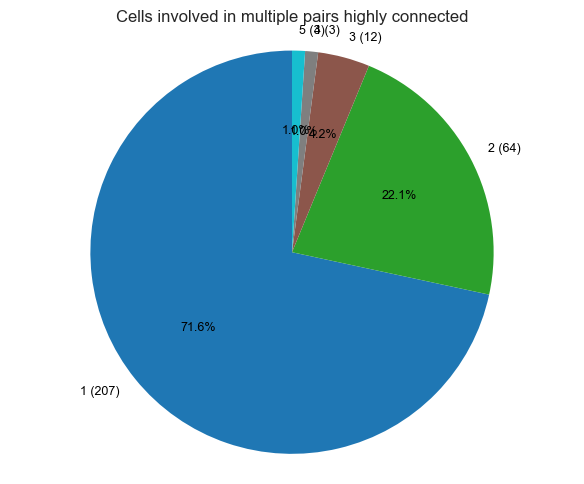

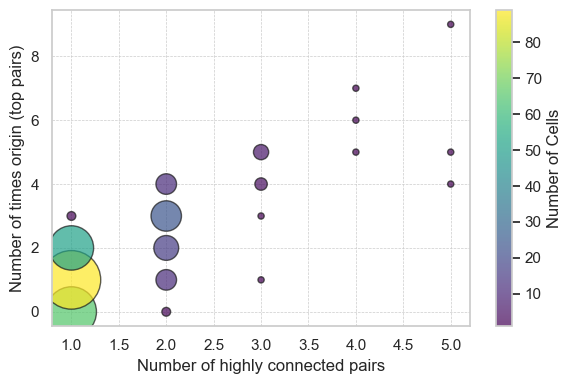

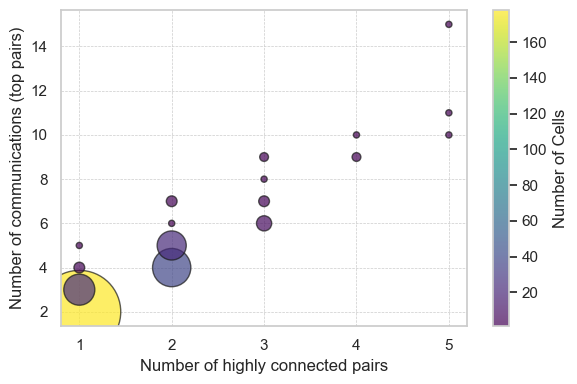

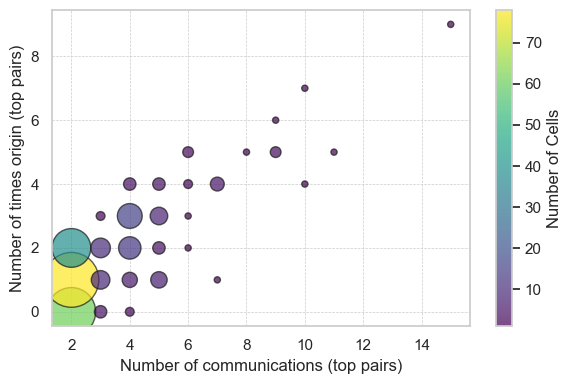

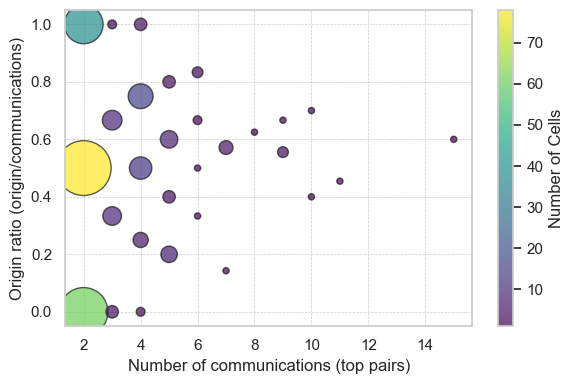

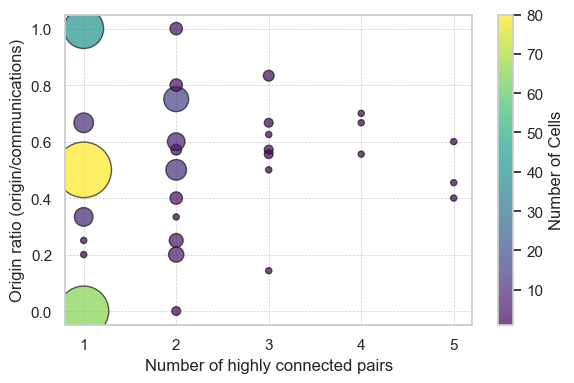

In [39]:
plot_pie_chart(
    df=highly_connected_cells,
    column="Number of highly connected pairs",
    title="Cells involved in multiple pairs highly connected"
)

plot_scatter_size_coded(
    df=highly_connected_cells,
    x_col="Number of highly connected pairs",
    y_col="Number of times origin (top pairs)"
)

plot_scatter_size_coded(
    df=highly_connected_cells,
    x_col="Number of highly connected pairs",
    y_col="Number of communications (top pairs)"
)

plot_scatter_size_coded(
    df=highly_connected_cells,
    x_col="Number of communications (top pairs)",
    y_col="Number of times origin (top pairs)"
)

plot_scatter_size_coded(
    df=highly_connected_cells,
    x_col="Number of communications (top pairs)",
    y_col="Origin ratio (origin/communications)"
)

plot_scatter_size_coded(
    df=highly_connected_cells,
    x_col="Number of highly connected pairs",
    y_col="Origin ratio (origin/communications)"
)

[2025-08-26 16:25:05] [INFO] calcium: plot_points_mean_std: N=207 for Number of highly connected pairs=1
[2025-08-26 16:25:05] [INFO] calcium: plot_points_mean_std: N=64 for Number of highly connected pairs=2
[2025-08-26 16:25:05] [INFO] calcium: plot_points_mean_std: N=12 for Number of highly connected pairs=3
[2025-08-26 16:25:05] [INFO] calcium: plot_points_mean_std: N=3 for Number of highly connected pairs=4
[2025-08-26 16:25:05] [INFO] calcium: plot_points_mean_std: N=3 for Number of highly connected pairs=5


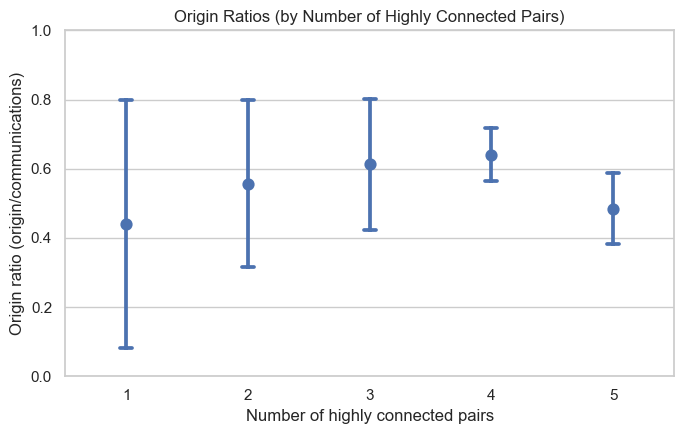

In [40]:
plot_points_mean_std(
    df=highly_connected_cells,
    x="Number of highly connected pairs",
    y="Origin ratio (origin/communications)",
    title="Origin Ratios (by Number of Highly Connected Pairs)",
    show_points=False,
    y_axis_boundaries=(0, 1)
)

[2025-08-26 16:25:05] [INFO] calcium: plot_histogram: removed 17 outliers out of 759 on 'Duration (s)' (lower=-34, upper=92)


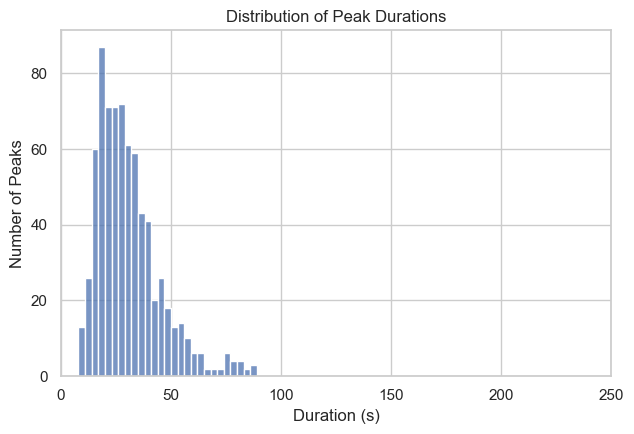

[2025-08-26 16:25:05] [INFO] calcium: plot_histogram: removed 37 outliers out of 759 on 'Prominence (noise std units)' (lower=-71.2, upper=140.2)


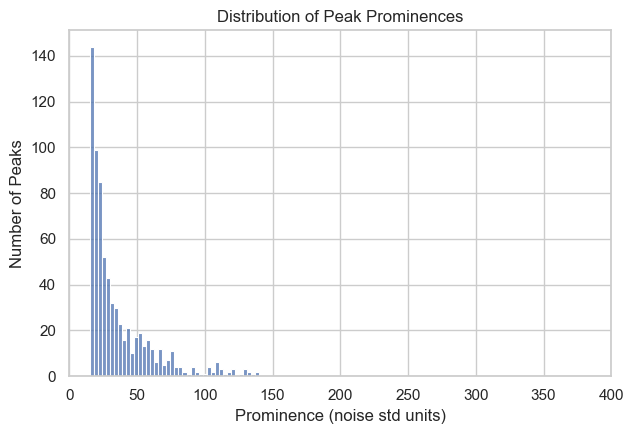

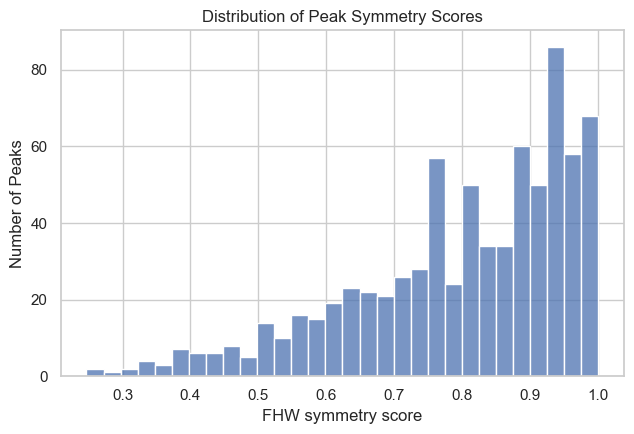

[2025-08-26 16:25:06] [INFO] calcium: plot_histogram: removed 0 outliers out of 442 on 'Speed (um/s)' (lower=-23.777, upper=35.583)


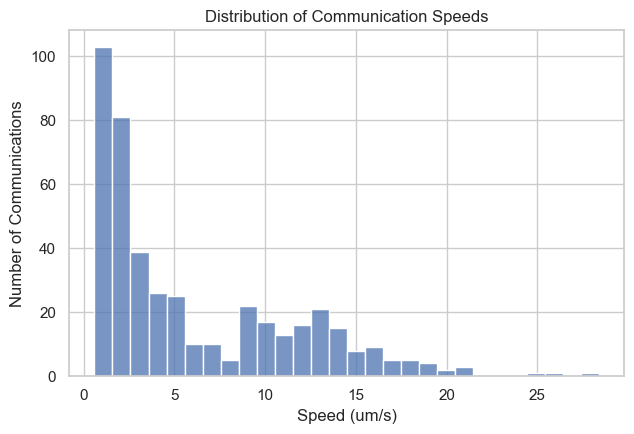

In [41]:
plot_histogram(
    df=peaks[(peaks["In event"] == "sequential") & (peaks["from_high_comm_pair"])],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks[(peaks["In event"] == "sequential") & (peaks["from_high_comm_pair"])],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks[(peaks["In event"] == "sequential") & (peaks["from_high_comm_pair"])],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)
plot_histogram(
    df=communications[communications["from_high_comm_pair"]],
    column="Speed (um/s)",
    title="Distribution of Communication Speeds",
    ylabel="Number of Communications",
    bin_width=1,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False
)

[2025-08-26 16:25:06] [INFO] calcium: plot_histogram_by_group: removed 38 outliers out of 1804 on 'Duration (s)' (lower=-38, upper=95)


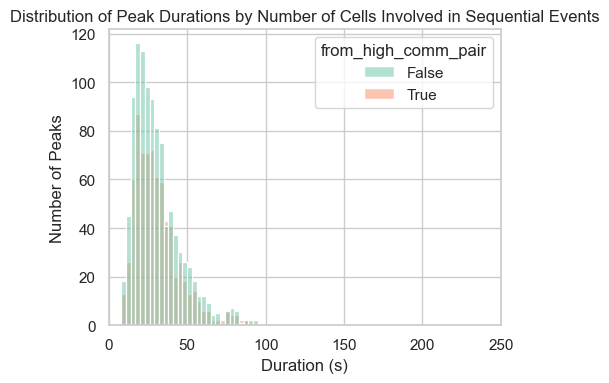

[2025-08-26 16:25:06] [INFO] calcium: plot_histogram_by_group: removed 98 outliers out of 1804 on 'Prominence (noise std units)' (lower=-56.175, upper=119)


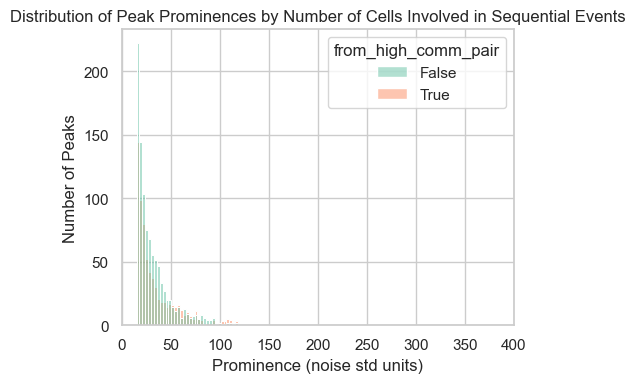

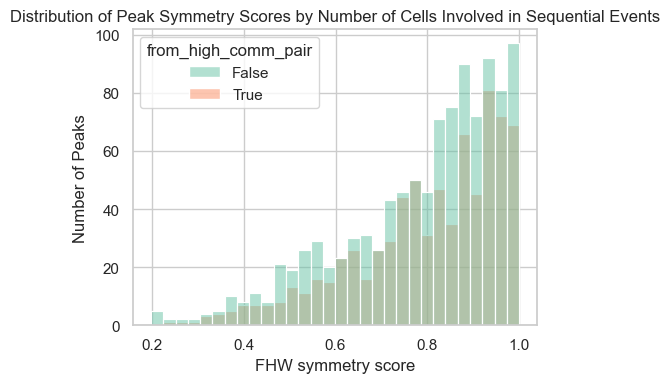

[2025-08-26 16:25:07] [INFO] calcium: plot_histogram_by_group: removed 0 outliers out of 1240 on 'Speed (um/s)' (lower=-20.348, upper=30.928)


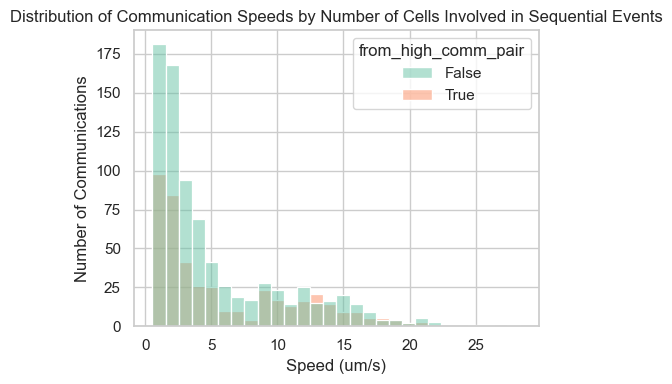

In [42]:
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="Duration (s)",
    group_column="from_high_comm_pair",
    title="Distribution of Peak Durations by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="Prominence (noise std units)",
    group_column="from_high_comm_pair",
    title="Distribution of Peak Prominences by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="FHW symmetry score",
    group_column="from_high_comm_pair",
    title="Distribution of Peak Symmetry Scores by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_count=30,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=communications,
    value_column="Speed (um/s)",
    group_column="from_high_comm_pair",
    title="Distribution of Communication Speeds by Number of Cells Involved in Sequential Events",
    ylabel="Number of Communications",
    bin_width=1,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False
)

## INDIVIDUAL EVENTS

### Cells Occurrences in individual events

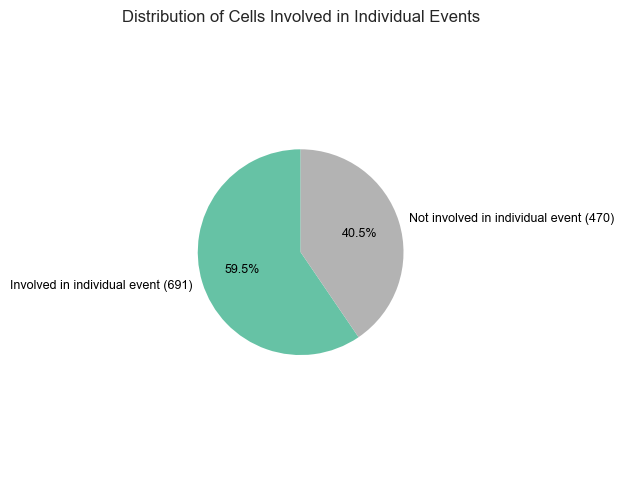

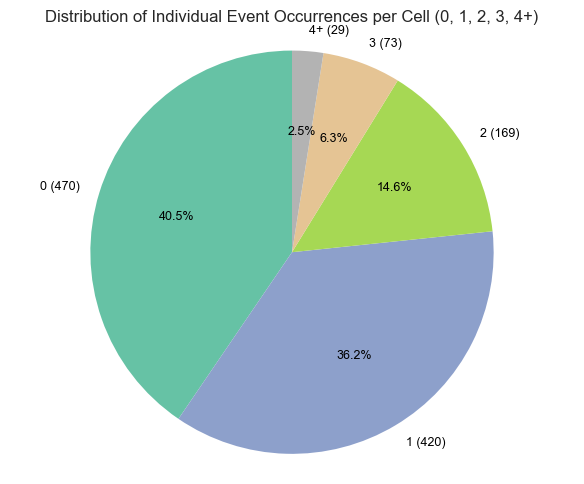

In [43]:
cells["Involved in individual event"] = cells["Occurrences in individual events"].apply(lambda x: "Involved in individual event" if x > 0 else "Not involved in individual event")

plot_pie_chart(
    df=cells,
    column="Involved in individual event",
    title="Distribution of Cells Involved in Individual Events",
    palette="Set2"
)

def cells_category(n: int) -> str:
    if n == 0:
        return "0"
    elif n == 1:
        return "1"
    elif n == 2:
        return "2"
    elif n == 3:
        return "3"
    else:
        return "4+"

cells["Occurrences in individual events category"] = cells["Occurrences in individual events"].apply(cells_category)

plot_pie_chart(
    df=cells,
    column="Occurrences in individual events category",
    title="Distribution of Individual Event Occurrences per Cell (0, 1, 2, 3, 4+)",
    palette="Set2"
)

In [44]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_occurrences_in_individual_events_overlay.png",
    title="Cell Mapping with Occurrences in Individual Events Overlay",
    figsize=(5, 6)
)

[2025-08-26 16:25:07] [ERROR] calcium: Failed to read image 'D:\Mateo\20250618\Output\IS1\cell-mapping\cell_occurrences_in_individual_events_overlay.png': [Errno 2] No such file or directory: 'D:\\Mateo\\20250618\\Output\\IS1\\cell-mapping\\cell_occurrences_in_individual_events_overlay.png'
Traceback (most recent call last):
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py", line 243, in visualize_image
    img = imread(img_path)
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\matplotlib\image.py", line 1512, in imread
    with img_open(fname) as image:
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\PIL\ImageFile.py", line 132, in __init__
    self.fp = 

### Peaks statistics in individual events

[2025-08-26 16:25:07] [INFO] calcium: plot_histogram: removed 19 outliers out of 1104 on 'Duration (s)' (lower=-35, upper=84)


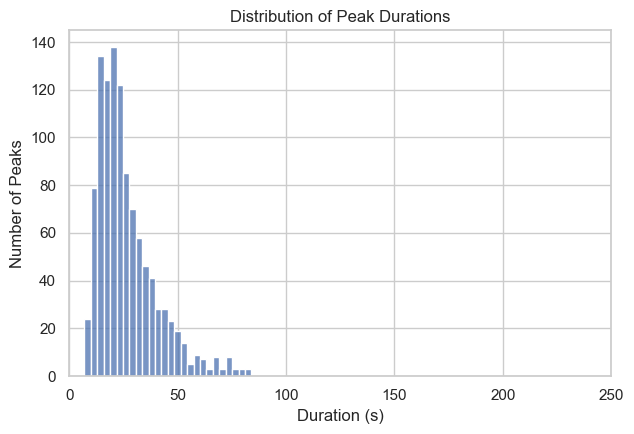

[2025-08-26 16:25:07] [INFO] calcium: plot_histogram: removed 50 outliers out of 1104 on 'Prominence (noise std units)' (lower=-26.6, upper=77)


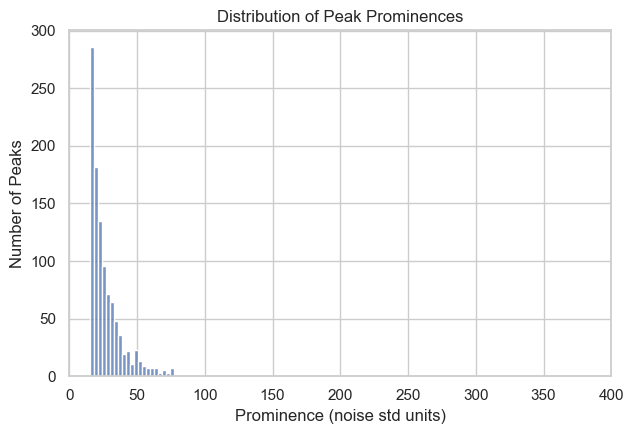

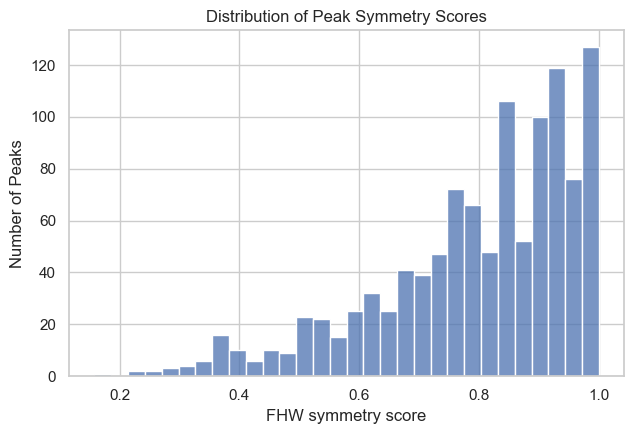

In [45]:
plot_histogram(
    df=peaks[peaks["In event"] == "individual"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks[peaks["In event"] == "individual"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks[peaks["In event"] == "individual"],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Correlation between event activity level & individual activity level

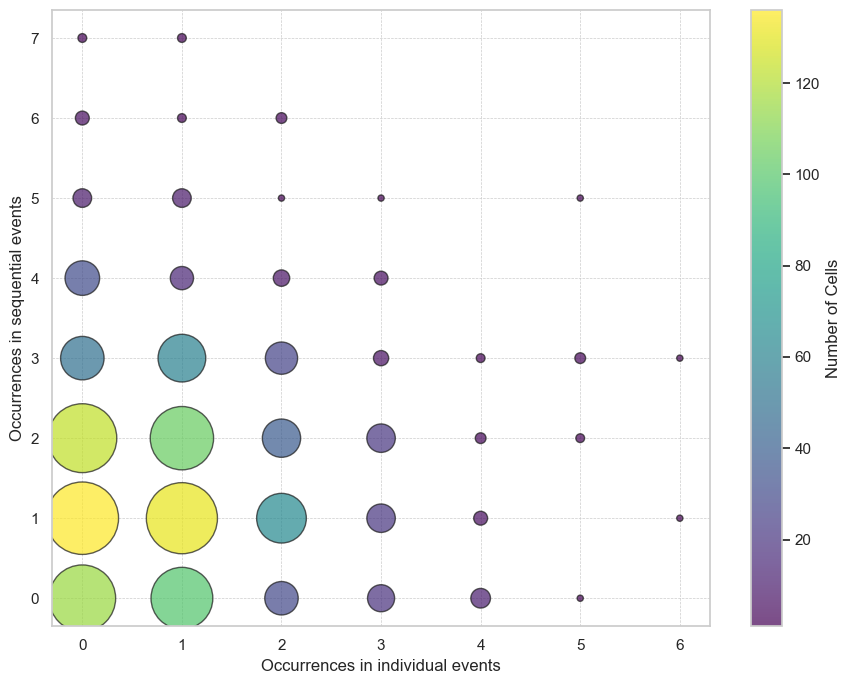

[2025-08-26 16:25:08] [INFO] calcium: plot_points_mean_std: removed 14/1161 outliers on 'Occurrences in sequential events' (lower=-2, upper=5)
[2025-08-26 16:25:08] [INFO] calcium: plot_points_mean_std: N=463 for Occurrences in individual events=0
[2025-08-26 16:25:08] [INFO] calcium: plot_points_mean_std: N=416 for Occurrences in individual events=1
[2025-08-26 16:25:08] [INFO] calcium: plot_points_mean_std: N=166 for Occurrences in individual events=2
[2025-08-26 16:25:08] [INFO] calcium: plot_points_mean_std: N=73 for Occurrences in individual events=3
[2025-08-26 16:25:08] [INFO] calcium: plot_points_mean_std: N=20 for Occurrences in individual events=4
[2025-08-26 16:25:08] [INFO] calcium: plot_points_mean_std: N=7 for Occurrences in individual events=5
[2025-08-26 16:25:08] [INFO] calcium: plot_points_mean_std: N=2 for Occurrences in individual events=6


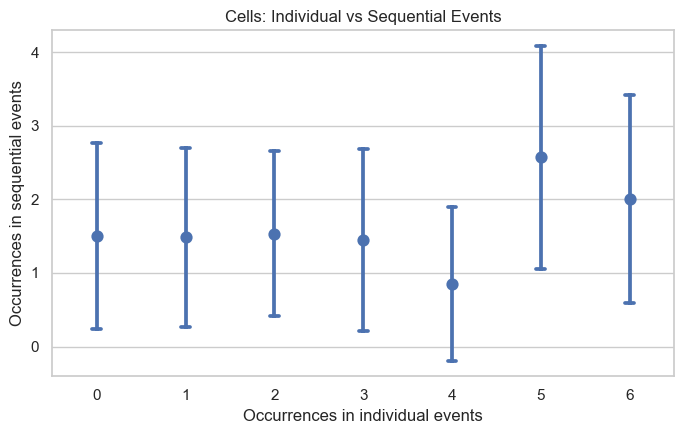

In [46]:
plot_scatter_size_coded(
    df=cells,
    x_col="Occurrences in individual events",
    y_col="Occurrences in sequential events",
    size_scale=20,
    figsize=(9, 7)
)

plot_points_mean_std(
    df=cells,
    x="Occurrences in individual events",
    y="Occurrences in sequential events",
    title="Cells: Individual vs Sequential Events",
    show_points=False,
    filter_outliers=True,
    outliers_bounds=(3, 3),
)

## CELLS MOTION

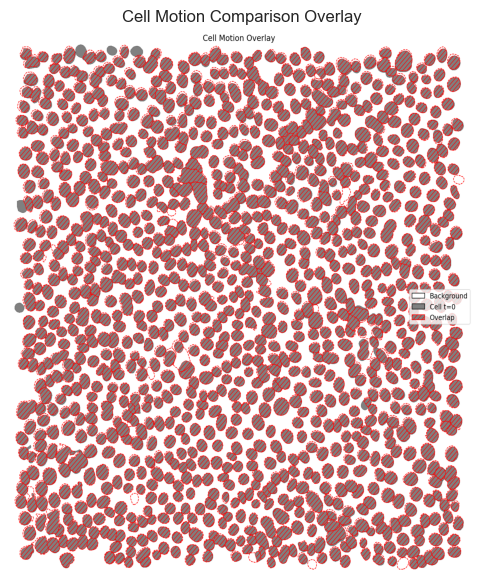

Number of cells:
- Hoechst image taken at t=0: 1161
- Hoechst image taken at t=1801: 1160
- Number of cells difference: absolute 1, relative 0.09%
Pixel-level cell segmentation:
- Total number of pixels in image: 4194304
- Pixels segmented as cell at t=0: 1182638
- Pixels segmented as cell at t=1801: 1209431
- Overlapping pixels between t=0 and t=1801: 1094218(91.49% of total)
- Pixels exclusive to t=0: 88420 (7.48% of total)
- Pixels exclusive to t=1801: 115213 (9.53% of total)


In [47]:
visualize_image(
    image_source=control_paths,
    image_name="cell-motion/cellmotion_comparison_overlay.png",
    title="Cell Motion Comparison Overlay",
    figsize=(5, 6)
)

cm = cellmotion.set_index("Metric")["Value"]
print("Number of cells:")
print(f"- Hoechst image taken at t=0: {int(cm['n_cells_t0'])}")
print(f"- Hoechst image taken at t=1801: {int(cm['n_cells_t1'])}")
print(
    f"- Number of cells difference: absolute {int(cm['cell_count_diff_abs'])}, "
    f"relative {cm['cell_count_diff_rel'] * 100:.2f}%"
)
print("Pixel-level cell segmentation:")
print(f"- Total number of pixels in image: {int(cm['total_pixels'])}")
print(f"- Pixels segmented as cell at t=0: {int(cm['pixels_t0'])}")
print(f"- Pixels segmented as cell at t=1801: {int(cm['pixels_t1'])}")
print(f"- Overlapping pixels between t=0 and t=1801: {int(cm['pixels_both'])}"
      f"({cm['pixels_both_rel'] * 100:.2f}% of total)")
print(f"- Pixels exclusive to t=0: {int(cm['pixels_only_t0'])} "
      f"({cm['pixels_only_t0_rel'] * 100:.2f}% of total)")
print(f"- Pixels exclusive to t=1801: {int(cm['pixels_only_t1'])} "
      f"({cm['pixels_only_t1_rel'] * 100:.2f}% of total)")
